# Brazilian E-Commerce Dataset by Olist - Recommender Systems

__Table of content:__

- [1 Introduction](#1_Introduction) <br>
    - [1.1 KPI,](#1.1_KPI)
    - [1.2 Setup,](#1.2_Setup)
        - [1.2.1 Load Libraries,](#1.2.1_Load_Libraries)
        - [1.2.2 Set up of the dataset.](#1.2.2_Set_up_of_the_dataset)
    - [1.3 Data preparation,](#1.3_Data_preparation)
        - [1.3.1 Duplicate Observations,](#1.3.1_Duplicate_Observations)
        - [1.3.2 Investigation of missing values.](#1.3.2_Investigation_of_missing_values)
- [2 Recommender System](#2_Recommender_System)
    - [2.1 Descriptive Analysis,](#)
        - [2.1.1 General Characteristics of Review Score,](#2.1.1_General_Characteristics_of_Review_Score)
        - [2.1.2 Returning Customers,](#2.1.2_Returning_Customers)
        - [2.1.3 Products and Product Categories,](#2.1.3_Products_and_Product_Categories)
        - [2.1.4 Review Score and Product Category,](#2.1.4_Review_Score_and_Product_Category)
        - [2.1.5 Review Score Over Time,](#2.1.5_Review_Score_Over_Time)
        - [2.1.6 Review Score and Delivery Time,](#2.1.6_Review_Score_and_Delivery_Time)
        - [2.1.7 Purchase Patterns,](#2.1.7_Purchase_Patterns)
        - [2.1.8 Final Remarks - Descriptive Analysis.](#2.1.8_Final_Remarks_-_Descriptive_Analysis)
    - [2.2 Preparing for Modelling,](#2.2_Preparing_for_Modelling)
        - [2.2.1 Loading Recommender Packages - Surprise,](#2.2.1_Loading_Recommender_Packages_-_Surprise)
        - [2.2.2 Convert to the right format,](#2.2.2_Convert_to_the_right_format)
        - [2.2.3 Train/test split,](#2.2.3_Train/test_split)
        - [2.2.4 Performance Evaluation.](#2.2.4_Performance_Evaluation)
    - [2.3 Baseline Models,](#2.3_Baseline_Models)
        - [2.3.1 Global Mean,](#2.3.1_Global_Mean)
        - [2.3.2 NormalPredictor,](#2.3.2_NormalPredictor)
        - [2.3.3 BaselineOnly,](#2.3.3_BaselineOnly)
        - [2.3.4 Final Remarks - Baseline Models.](#2.3.4_Final_Remarks_-_Baseline_Models)
    - [2.4 Collaborative Filtering,](#2.4_Collaborative_Filtering)
        - [2.4.1 Defining the Models,](#2.4.1_Defining_the_Models)
        - [2.4.2 Grid Search,](#2.4.2_Grid_Search)
        - [2.4.3 Predictions and Performance - Optimised Models,](#2.4.3_Predictions_and_Performance_-_Optimised_Models)
        - [2.4.4 The Cold Start Problem,](#2.4.4_The_Cold_Start_Problem)
        - [2.4.5 Final Remarks - Collaborative Filtering.](#2.4.5_Final_Remarks_-_Collaborative_Filtering)
    - [2.5 Item-Item Collaborative Filtering Example,](#2.5_Item-Item_Collaborative_Filtering_Example)
        - [2.5.1 Final Remarks - Item-Item Collaborative Filtering Exampel.](#2.5.1_Final_Remarks_-_Item-Item_Collaborative_Filtering_Exampel)
- [3 Conclusion](#3_Conclusion)

# 1 Introduction

The leading problem within the e-commerce industry is the fact that they have troubles ensuring the same superior customer service as physical stores. The e-commerce industry can not to the same degree as the physical stores' guide and help shoppers. They do not have any salesperson that by interaction can help the shopper find what he/she is looking for or give specific recommendations based on the shoppers' preferences. This can lead to less sales and unhappy customers. <br>

In a pursue to tackle this problem, the e-commerce industry has developed well-performing recommender systems. Recommender systems have shown to be critical for them as they can recommend new products to users based analysing a user's purchase pattern. Thereby helps the recommender system the user find new and exciting products, and help the company generate more sales and revenue. Consequently, an e-commerce company like Olist must consider recommender systems if they want to keep up with their industry. <br>

Accordingly, in this analysis, a good performing recommender system that can help Olist to increase the sales and revenues sales of their sellers and attract more new sellers, will be developed. It will, in turn, help with increasing the sales and revenue of Olist and thereby perform better on the sales and revenue KPI. <br>
In order to build the best possible recommender system for Olist, firstly, a descriptive analysis of the data available are conducted. Through this analysis, one will obtain a general idea of the review score and what possibilities the data gives. Following the descriptive analysis, the building some small general recommender systems, which will be the baseline models will be conducted. These models will be the reference point for how well the following recommender systems will perform. For measuring performance, RMSE will be used. When the reference point is made, the building of more complex recommender systems will begin, and these will be tried optimised to get the best performing system. Thereafter, a tangible example of utilising an item-item collaborative filtering method to make recommendations to a given user is provided to show its applicability. It all is ended with the final remarks and a conclusion, including a recommendation for which recommender system Olist should use and how they in the future could improve their recommender system.<br>

Unfortunately, due to data limitations, only collaborative filtering recommender systems will be considered.



## 1.1 KPI

Increasing sales is as important in the e-commerce industry as in any, and a recommender system for Olist would help the customer with finding relevant products for them, which would increase the sales and revenue, and lower the churn rate. Consequently, it is recommended for Olist to measure the gained business value, by the implementation of a recommender system, via sales and revenue. Thereby, can the business value easily can be measured directly by tracking the effects on sales or revenue that is a result of an increase in sales or shift in sales distributions provoked by the recommender system. Nevertheless, Olist needs to ensure that the chosen measure is aligned with their strategy, and therefore it is suggested to measure the business value in revenue gain. Specifically, the following two KPI’s are recommended for Olist to use in their evaluation of the business value gain:
- Sales:<br>
Revenue of the sales. <br>
- Revenue per visitor, <br>
An average of how much a person spends during a visit on the website.  <br>

Other KPI’s could also have been recommended. However, Olist must remember to align the KPI’s they chose with their strategy, and not to chose too many KPI’s to measure at once.
Furthermore, it will not be possible during the analysis to see whether the recommender system actually will improve these KPI’s as it will not be tested in the field and see whether it makes suitable recommendations that will improve the sales and revenue.


## 1.2 Setup

In the following, everything will be set up in order to be ready to make the analysis.
The setup will include:
- Loading of the needed libraries,
- Set up of the dataset.

### 1.2.1 Load Libraries

All the required libraries for making the analysis are loaded and made ready for usage.

In [1]:
#Loading of necessary packages.
import numpy as np
import pandas as pd
import sys, os
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from scipy import stats
from IPython.display import Image
from IPython.core.display import HTML 
import folium
from folium.plugins import HeatMap
sns.set_style("whitegrid")

C:\Users\mossi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.2.2 Set up of the dataset

In the data will be loaded, a suitable subset of the data will be identified, and the different data sources will be merged into one dataset. <br>
Firstly, the different data sources are loaded, and it is the following data from the Brazilian E-Commerce Public Dataset that will be the different sources.  
- `olist_order_items_dataset`
- `olist_order_payments_dataset`
- `olist_orders_dataset`
- `olist_order_reviews_dataset`
- `olist_products_dataset`
- `olist_customers_dataset`
- `product_category_name_translation` <br>

These individual data files are loaded below.

In [2]:
#Loading of data.
orders = pd.read_csv('data/olist_orders_dataset.csv', 
                     parse_dates=['order_estimated_delivery_date', 'order_delivered_customer_date', 
                                  'order_approved_at', 'order_purchase_timestamp'])
payments = pd.read_csv('data/olist_order_payments_dataset.csv')
items = pd.read_csv('data/olist_order_items_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
category = pd.read_csv('data/product_category_name_translation.csv', )
reviews = pd.read_csv('data/olist_order_reviews_dataset.csv', parse_dates=['review_creation_date', 'review_answer_timestamp'])
customer = pd.read_csv('data/olist_customers_dataset.csv')

It is acknowledged that the Brazilian E-Commerce Public Dataset has information on 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil and is therefore quite large. Thus, it may require more computational resources than currently available. Consequently, it was chosen to use a subset of the datasets which is bound to a specific geographic region. An investigation of which area to chose is conducted below. <br>

The investigation starts with obtaining an overview of the geographical values. 

In [3]:
#What is the number of states and cities in the dataset.
print ("Number of unique cities is",customer['customer_city'].nunique())
print ("Number of unique zip codes is",customer['customer_zip_code_prefix'].nunique())
print ("Number of unique states is",customer['customer_state'].nunique())

Number of unique cities is 4119
Number of unique zip codes is 14994
Number of unique states is 27


There are a lot of different cities and zip-codes, but the number of stats is smaller, which by first glance makes a given stat to be the best option for subset bound to a geographical region. Reason being, for the subset to provide a meaningful representation of the full dataset it needs to contain a certain amount of the full dataset.

To further investigate whether a particular stat could be an interesting subset, a heatmap will be made. The heatmap is made based on the customer location and will provide an overview of the customer distribution throughout Brazil.

In [4]:
#Loading of data for geographic investigation.
geo = pd.read_csv('data/olist_geolocation_dataset.csv')

In [5]:
#Making a heatmap of the customers.
yesyes = geo.groupby('geolocation_zip_code_prefix').mean()
geo_cust_count = pd.merge(customer.set_index('customer_zip_code_prefix'),yesyes,how='left', left_index=True, right_index=True)

mapp = folium.Map(location=[-15.8267,-47.9218],
                  zoom_start = 4.5, tiles='Stamen Toner')
heat_df = geo_cust_count[['geolocation_lat', 'geolocation_lng']]
heat_df = heat_df.dropna(axis=0, subset=['geolocation_lat', 'geolocation_lng'])

# List comprehension to make out list of lists.
heat_data = [[row['geolocation_lat'],row['geolocation_lng']] for index, row in heat_df.iterrows()]

# Plot it on the map.
HeatMap(heat_data,min_opacity=0.5,blur=30).add_to(mapp)
mapp

The heatmap above indicates that Sao Paolo, Rio de Janeiro, Belo Horizonte and appears to have a high number of customers, making them an interesting choice for a subset of the data. This is further investigated below via another plot.

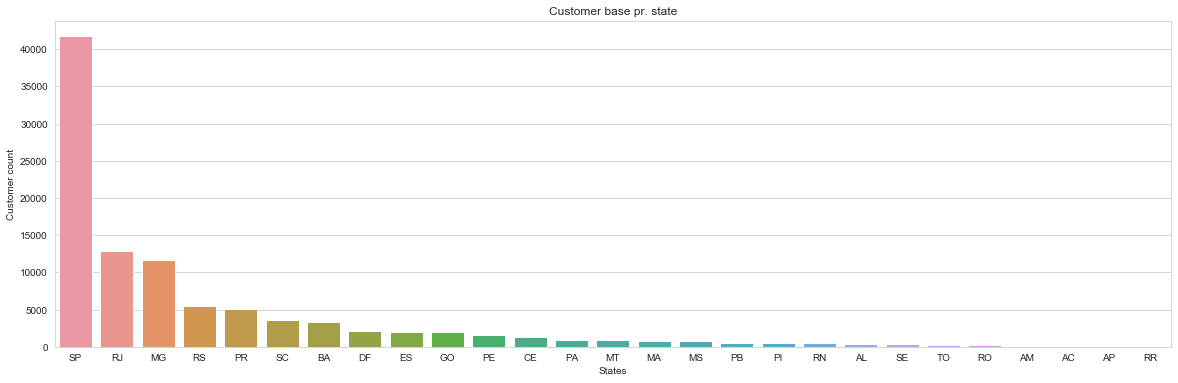

In [6]:
#Customer pr. state in a plot.
plt.figure(figsize=(20,6))

ax = sns.countplot(x="customer_state", data=customer, order=customer['customer_state'].value_counts().index)
ax.set(xlabel='States', ylabel='Customer count')

plt.title("Customer base pr. state")
plt.show()

Now it can be derived that Sao Paulo has the biggest customer base, and could be an interesting subset of the data. For this reason the stat Sao Paulo is chosen as the particular geographical area which the analysis will be conducted upon. <br>
Therefore, all customers in the state of Sao Paulo is identified and stored for making the filtering later. 

In [7]:
#Only keeping customer from the stat Sao Paulo.
customerID_to_use = customer[customer.customer_city == 'sao paulo'].customer_id.unique()
print(customerID_to_use.shape)
customerID_to_use

(15540,)


array(['4e7b3e00288586ebd08712fdd0374a03',
       'fd826e7cf63160e536e0908c76c3f441',
       'eabebad39a88bb6f5b52376faec28612', ...,
       '821a7275a08f32975caceff2e08ea262',
       'c6ece8a5137f3c9c3a3a12302a19a2ac',
       '17ddf5dd5d51696bb3d7c6291687be6f'], dtype=object)

Now that the geographical area has been decided the different data sources can be merged into one dataset.

#### Merging of data to the final dataset

The files are merged by a left-join operation according to the following data schema, which is from the [kaggle webpage](https://www.kaggle.com/olistbr/brazilian-ecommerce) for the dataset. 

In [8]:
#Visualisation of the how the dataset can be merged.
from IPython.display import Image
Image(url='https://i.imgur.com/HRhd2Y0.png',width=600)

In [9]:
#Merge of the data files into a final united dataset.
dfRS = customer.merge(orders, on='customer_id', how='left')
dfRS = dfRS.merge(payments, on='order_id', how='left')
dfRS = dfRS.merge(items, on='order_id', how='left')
dfRS = dfRS.merge(products, on='product_id', how='left')
dfRS = dfRS.merge(category, on='product_category_name', how='left')
dfRS = dfRS.merge(reviews, on='order_id', how='left')

#Reduce so only in Sao Paolo.
dfRS = dfRS[dfRS['customer_id'].isin(customerID_to_use)]

The dataset is now ready to be used. But firstly some data preparation is needed.

## 1.3 Data Preparation

To get the best data quality possible, no duplicated observations and missing values must be present in the dataset. Accordingly, in the following, there will be deal with duplicates and missing values.

### 1.3.1 Duplicate Observations

Potential duplicate observations are being dropped to secure the best data quality. <br>
In identifying the duplicated observation, it is assumed that if the customer, product and rating are the same for two observations, then they are duplicates.

In [10]:
#Dropping all duplicate columns.
dfRS = dfRS[dfRS.duplicated(subset=['product_id','customer_unique_id','review_score'], keep='first') == False]

In [11]:
#Printing shape after removal of duplicates.
dfRS.shape

(16211, 37)

### 1.3.2 Investigation of missing values

Missing values is data values that are not stored for a variable in the observation of interest, and they are a common problem and a reality in real-world data. Missing values can cause errors and have a significant effect on the conclusions that can be drawn from the data. <br>
Accordingly, studies have focused on how to handle the missing data, problems caused by missing data, and the methods to avoid or minimize missing values. However, there is no golden way of handling missing values. Generally speaking, there are three methods of handling missing values:
1. Remove rows or columns containing missing values
2. Predict missing values
3. Impute missing values

For picking the proper approach to handle the missing values, an investigation of the missing values is conducted. <br>
Firstly, the total number of missing values and the number of columns with missing values will be calculated.


In [12]:
#Total number of #Missing values.
print('Total number of missing values =', dfRS.isnull().sum().sum())

#Missing values with column.
Column_with_NaN = dfRS.isnull().any().sum()
print('Number of columns with NaN =', Column_with_NaN)

Total number of missing values = 28360
Number of columns with NaN = 20


In total there are 28.360 missing values in the dataset, and they are distributed among 20 columns.
Now an investigation of which columns are having missing values will be made.

In [13]:
#Missing values pr. column.
dfRS.isna().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   27
order_delivered_carrier_date       343
order_delivered_customer_date      496
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
order_item_id                      136
product_id                         136
seller_id                          136
shipping_limit_date                136
price                              136
freight_value                      136
product_category_name              401
product_name_lenght                401
product_description_lenght         401
product_photos_qty       

In [14]:
#Percentage of missing values.
round((dfRS.isna().sum())/len(dfRS),2)

customer_id                      0.00
customer_unique_id               0.00
customer_zip_code_prefix         0.00
customer_city                    0.00
customer_state                   0.00
order_id                         0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.00
order_delivered_carrier_date     0.02
order_delivered_customer_date    0.03
order_estimated_delivery_date    0.00
payment_sequential               0.00
payment_type                     0.00
payment_installments             0.00
payment_value                    0.00
order_item_id                    0.01
product_id                       0.01
seller_id                        0.01
shipping_limit_date              0.01
price                            0.01
freight_value                    0.01
product_category_name            0.02
product_name_lenght              0.02
product_description_lenght       0.02
product_photos_qty               0.02
product_weig

It is seen that two columns, `review_comment_title` and `review_comment_message`, have more than 60% missing values. Therefore, these two columns will be dropped. Furthermore, they are not of interest for this analysis as NLP will not play any role in the recommender systems.

In [15]:
#Dropping the two columns.
dfRS = dfRS.drop(['review_comment_title'], axis=1)
dfRS = dfRS.drop(['review_comment_message'], axis=1)

#New total number of missing values.
print('Total number of missing values =', dfRS.isnull().sum().sum())

Total number of missing values = 4232


The number of missing values have been reduced to 4232. In order to further reduce the number of missing values, it is of interest to see how many rows they are distributed over. 

In [16]:
#Number of rows with missing values.
print('Number of rows with missing values =', dfRS.isnull().any(axis=1).sum())

#Percentage of rows with missing values.
print('Percentage of rows with missing values =',(dfRS.isnull().any(axis=1).sum())/dfRS.shape[0])
count_row = dfRS.shape[0]

Number of rows with missing values = 749
Percentage of rows with missing values = 0.04620319536117451


The last 4232 missing values are distributed among 749 rows, which is 4.6% of the total number of observations. It is such a small percentage, that even though you usually are not interested in dropping observation, they will be d dropped as it will not affect the results significantly.

In [17]:
#Dropping all NaN's.
dfRS = dfRS.dropna()

Thereby is the final shape of the dataset the following:

In [18]:
#Showing the final dataset shape.
print('Final datset size =' , dfRS.shape)

Final datset size = (15462, 35)


# 2 Recommender System

Now that the data is ready and a brief introduction to recommender systems has been given, the analysis can be initiated. <br>
Firstly, a descriptive analysis of the data available will be conducted. Through this analysis, a general idea of which parameters to use and what possibilities the data gives will be obtained. Following the descriptive analysis, the baseline models will be built. These models will be the reference point for how well the following recommender systems will perform. For measuring performance, RMSE will be used. When the reference point is made, the building of more complex recommender systems will begin. These will be tried to be optimised to get the best performing recommender system possible. Following this, a recommendation example will be made. In this example, an Item-Item collaborative filtering method will be utilised to make tangible recommendations to a user, in order to show the applicability for Olist. Finally, a conclusion, including a proposal for which model Olist should use, will follow.


## 2.1 Descriptive Analysis

The dataset includes data about reviews made by the customers after they have received their order, and their purchases. After a customer has purchased a product from the Olist Store, the seller gets a notification that the seller has to fulfil the order. When the seller has fulfilled the order, and the customer has received the product, or the estimated delivery date is due, the customer gets a survey via email. The survey is a satisfaction survey where the customer can write comments and rate the purchase experience. It is from these surveys the review score data is obtained. <br>

The recommender system will be recommending new existing items to the customer based on their previous behaviour and ratings of products. Therefore, an understanding of the review score and purchase patterns are essential. The following will be investigated in this descriptive analysis to obtain such knowledge:
-	What are the general characteristics of the review scores?
    -	Summary statistics and distribution
-	How many are returning customer?
-	How many products and product categories are there and how many reviews do they have?
-	Are there differences in review score between different product categories?
-	Is there any development of the review scores over time?
-	Does delivery time influence the review score?
-	Purchase patterns

### 2.1.1 General Characteristics of Review Score

It is vital to understand and have an insight into the review score variable before starting investigating how other variables influence the review score. <br>
The first thing to investigate is the summary statistics for the review score. This provides a crucial insight into the data. The summary statistics used will be:
-	Mean
-	25 percentile and 75 percentile. 
-	Median 
-	Standard deviation

In [19]:
#Getting the summary statistics for the review score.
dfRS['review_score'].describe()

count    15462.000000
mean         4.194024
std          1.257175
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

The summary statistics show that the review score variable is towards the high end of the rating scale. The mean is 4.19, indicating that high values are almost always given. It is backed by the median (50% percentile) and the 25% percentile. The median is 5, thus, reporting that more than half of the observation is given a score of 5. The 25% percentile is 4, indicating that only 25% of the observations are given a rating of less than 4. A box plot is now provided to visualise it.

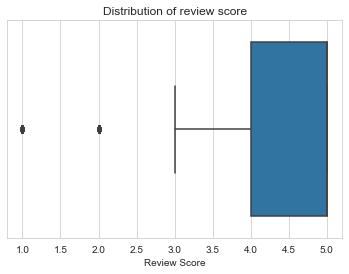

In [20]:
#Making a box plot of the review score, in order to visualise the previous findings.
plt.figure()
ax = sns.boxplot(dfRS['review_score'])
plt.title("Distribution of review score")
ax.set_xlabel('Review Score')
plt.show()

The box plot is supporting the findings from the summary statistics. Further, it indicates the observations that rate products with a score of 1 and 2 as outliers. Thus, also suggesting a tendency in the data towards high ratings.

Now that it has been determined that there is a tendency towards higher ratings, it is of interest to see the distribution of review score. 

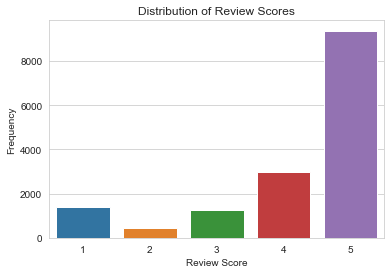

In [21]:
#Plotting the distribution of the review scores, to visualise the tendency towards higher ratings.
ax = sns.countplot(x="review_score", data=dfRS)
ax.set_title('Distribution of Review Scores')
ax.set_ylabel('Frequency')
ax.set_xlabel('Review Score')
plt.show()

The plot also shows the recent findings of the review score. The plot also really indicates that the distribution of review score is something to have in mind when making simple models. Reason being a simple model may perform well by just predicting a high rating.

### 2.1.2 Returning Customers

High review score would suggest that the customers are happy with their shopping at Olist. An investigation of this statement will now be conducted. It will be made by examining how many customers are returning customers.

The total amount of orders and the total number of customers is needed to make such an investigation. The variable `order_id` will be counted to calculate the total amount of orders since it is a unique identifier of an order. <br>
`customer_unique_id` will be counted to calculate the total number of customers as it is a unique identifier of a customer. Further, `customer_unique_id` can be used to see if customers returns and have more than one order. <br>
Below will the total amount of orders, the total amount of customers, the number of one-time customers, and the number of returning customers be calculated and visualised.

In [22]:
#'order_id is a unique identifier of an order. Different for all orders.
#'customer_unique_id' is a unique identifier of a customer. If a customer makes more than one order this key will be the same. 
UniqueOrder = dfRS['order_id'].nunique()
NumberCustomer = dfRS['customer_unique_id'].nunique()

difference_1 = dfRS['customer_unique_id'].value_counts()
CounterLess1 = 0
for number in difference_1:
    if number <= 1: 
        CounterLess1 += 1
        
CounterGreater1 = 0
for number in difference_1:
    if number >= 2: 
        CounterGreater1 += 1

In [23]:
#Showcasing the different numbers.
print('Number of orders in total = ', UniqueOrder)
print('Number of customers in total = ', NumberCustomer)
print('Number of one time customers = ', CounterLess1)
print('Number of returning customers = ', CounterGreater1)
print('Percentage of one time customers = ', round((CounterLess1/14309)*100,2))
print('Percentage of returning customers = ', round((CounterGreater1/14309)*100,2))

Number of orders in total =  14773
Number of customers in total =  14309
Number of one time customers =  13389
Number of returning customers =  920
Percentage of one time customers =  93.57
Percentage of returning customers =  6.43


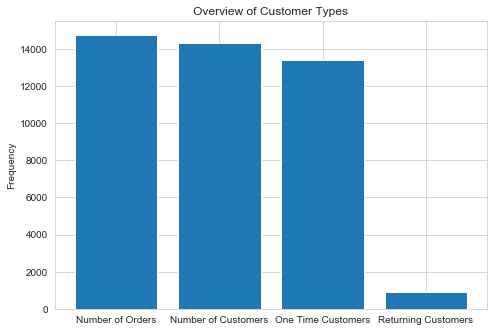

In [24]:
#Plotting the results to visualise them.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Name = ['Number of Orders', 'Number of Customers','One Time Customers', 'Returning Customers']
Number = [UniqueOrder,NumberCustomer,CounterLess1,CounterGreater1]
ax.set_title('Overview of Customer Types')
ax.bar(Name,Number)
ax.set_ylabel('Frequency')
plt.show()

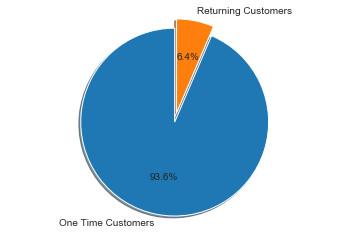

In [25]:
#Piechart of the returning customers.
labels = 'One Time Customers', 'Returning Customers'
sizes = [CounterLess1,CounterGreater1]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

It is identified that not many of the customers are returning customers, which is a surprise based on the high review scores. The majority is one time customers, 93.6%. Thereby, 93.6% of the customers make one order and is never seen again. This provides some difficulties when making recommender systems. Moreover, it only emphasises the need for a good recommender system at Olist, as it could help them retain customers and lower their churn rate.

### 2.1.3 Products and Product Categories

As Olist is a marketplace with different products and these products are categorised into product categories, it is of interest to find out how many products they have, how many categories they have, and how many products that are in each category. Another point of interest is how many reviews each product category have, as it will provide a general look into the data and the differences among product categories.

In [26]:
#Calculating the number of products and product categories and showcasing it.
Number_Products = dfRS['product_id'].nunique()
Product_Categories= dfRS['product_category_name_english'].nunique()

print('Number of unique products =', Number_Products)
print('Number of unique products categories =', Product_Categories)

Number of unique products = 9182
Number of unique products categories = 70


In total, there are 9182 products and 70 categories. The 9182 products provide Olist with the long tail phenomena, which is common in the e-commerce industry. But how are the 9182 products distributed among the different categories?

In [27]:
#Calculating number of products per. product category.
products_per_category = dfRS.groupby('product_category_name_english', as_index=False).agg({'product_id': ['count']})
products_per_category.columns = ['Product Category Name English', 'Count - Products']

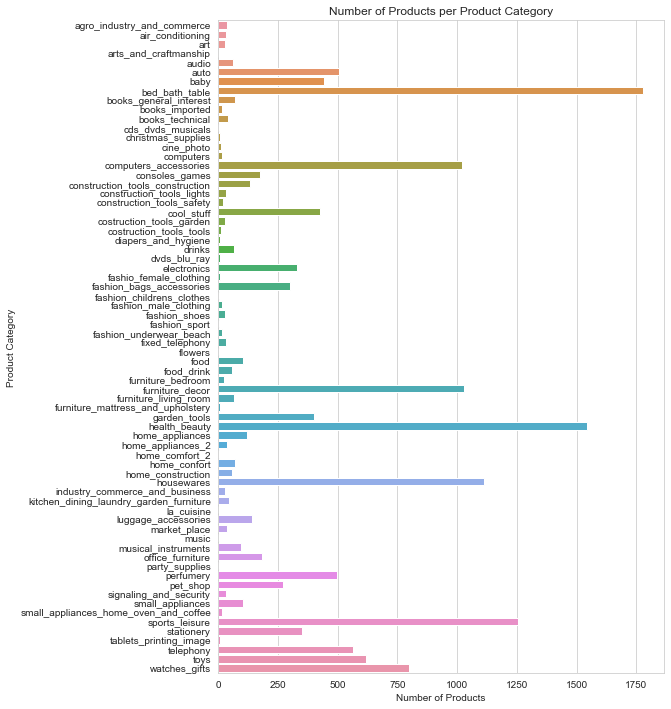

In [28]:
#Visualising number of products per. product category.
plt.figure(figsize=[8,12])
ax = sns.barplot(x="Count - Products", y="Product Category Name English", data=products_per_category)
ax.set_title('Number of Products per Product Category')
ax.set_ylabel('Product Category')
ax.set_xlabel('Number of Products')
plt.show()

A remarkable difference in the number of products per. product category is seen. Nevertheless, all 70 product categories plotted at once makes it hard to get a proper overview. Therefore, the top 25 and bottom 25 will be showcased in two individual plots.

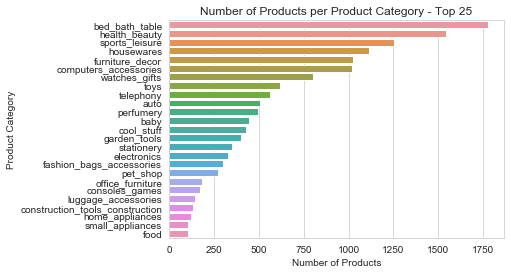

In [29]:
#Top 25 product categories measured on number of products in the category.
products_per_category_Top25 = products_per_category.nlargest(25, 'Count - Products')
plt.figure()
ax = sns.barplot(x="Count - Products", y="Product Category Name English", data=products_per_category_Top25)
ax.set_title('Number of Products per Product Category - Top 25')
ax.set_ylabel('Product Category')
ax.set_xlabel('Number of Products')
plt.show()

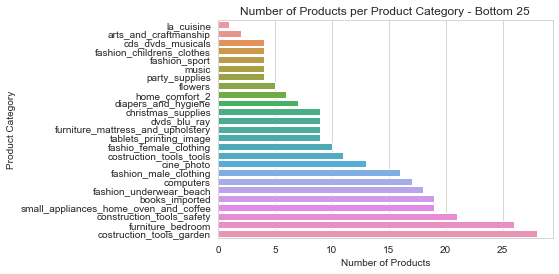

In [30]:
#Bottom 25 product categories measured on number of products in the category.
products_per_category_Bottom25 = products_per_category.nsmallest(25, 'Count - Products')
plt.figure()
ax = sns.barplot(x="Count - Products", y="Product Category Name English", data=products_per_category_Bottom25)
ax.set_title('Number of Products per Product Category - Bottom 25')
ax.set_ylabel('Product Category')
ax.set_xlabel('Number of Products')
plt.show()

From the top 25 and bottom 25 plot, it is seen that there exists a notable difference in the number of products per. product category. Due to the differences, some product categories will have a greater chance of being bought and get a review than others. <br>
Next, an investigation of how many reviews each product category has will be made.

In [31]:
#Number of reviews per. product category.
Reviews_per_category = dfRS.groupby('product_category_name_english', as_index=False).agg({'review_score': ['count', 'mean']})
Reviews_per_category.columns = ['Product Category Name English', 'Count - Review Score', 'Mean - Review Score']
Reviews_per_category = Reviews_per_category.sort_values(['Count - Review Score'],ascending=False).reset_index(drop=True)

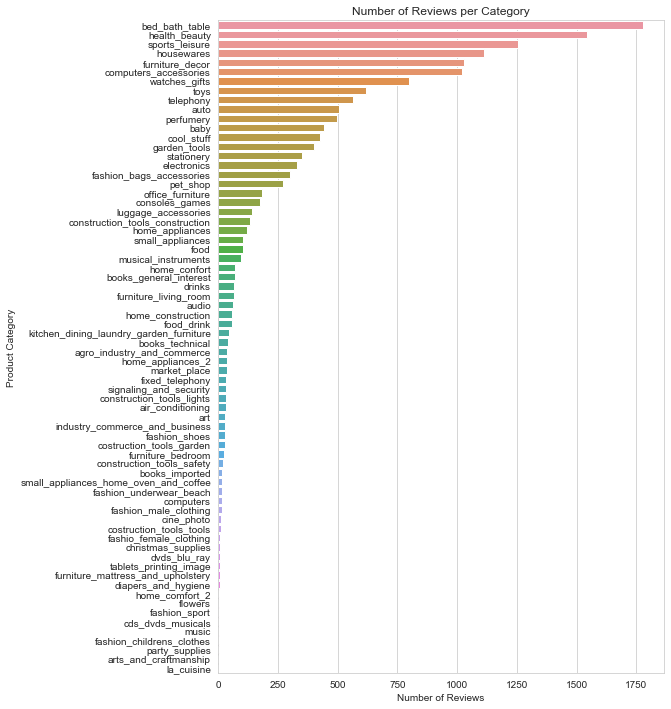

In [32]:
#Plot of number of reviews per. products categories.
plt.figure(figsize=[8,12])
ax = sns.barplot(x="Count - Review Score", y="Product Category Name English", data=Reviews_per_category)
ax.set_title('Number of Reviews per Category')
ax.set_ylabel('Product Category')
ax.set_xlabel('Number of Reviews')
plt.show()

As expected, is there a noticeable difference in the number of reviews between product categories. The top 10 and bottom 10 are shown individually below.

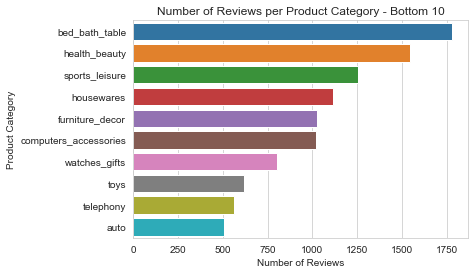

In [33]:
#Top 10 products categories measured on number of reviews.
Reviews_per_category_Top10 = Reviews_per_category.nlargest(10, 'Count - Review Score')
plt.figure()
ax = sns.barplot(x="Count - Review Score", y="Product Category Name English", data=Reviews_per_category_Top10)
ax.set_title('Number of Reviews per Product Category - Bottom 10')
ax.set_ylabel('Product Category')
ax.set_xlabel('Number of Reviews')
plt.show()

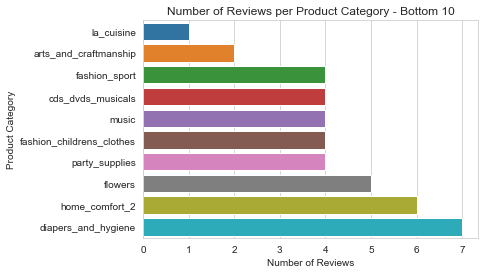

In [34]:
#Bottom 10 products categories measured on number of reviews.
Reviews_per_category_Bottom10 = Reviews_per_category.nsmallest(10, 'Count - Review Score')
plt.figure()
ax = sns.barplot(x="Count - Review Score", y="Product Category Name English", data=Reviews_per_category_Bottom10)
ax.set_title('Number of Reviews per Product Category - Bottom 10')
ax.set_ylabel('Product Category')
ax.set_xlabel('Number of Reviews')
plt.show()

The top 10 and bottom 10 is detailing that there are considerable differences in the number of reviews between product categories. Additionally, it shows that there within the top 10 is significant differences in the number of reviews, as number 1 have just ave 1.750 reviews, and number 10 has 500 reviews. A reason for this difference is the difference in the number of products per category.

### 2.1.4 Review Score and Product Category


Another interesting thing to check regarding the product categories is whether or not there are differences for the review score among product categories. It is expected that there exist differences, as it has been deduced that some product categories have a greater opportunity to get reviews as they contain more products and that some categories have a remarkable greater number of reviews currently. However, the difference should not be that high since there exists a tendency towards higher ratings, and only 25% of the reviews gave a score below 4.

In [35]:
#Calculating the mean review score per. product category.
avg_score_per_category = dfRS.groupby('product_category_name_english', as_index=False).agg({'review_score': ['count', 'mean']})
avg_score_per_category.columns = ['Product Category Name English', 'Count - Review Score', 'Mean - Review Score']
avg_score_per_category = avg_score_per_category.sort_values(['Mean - Review Score'],ascending=False).reset_index(drop=True)

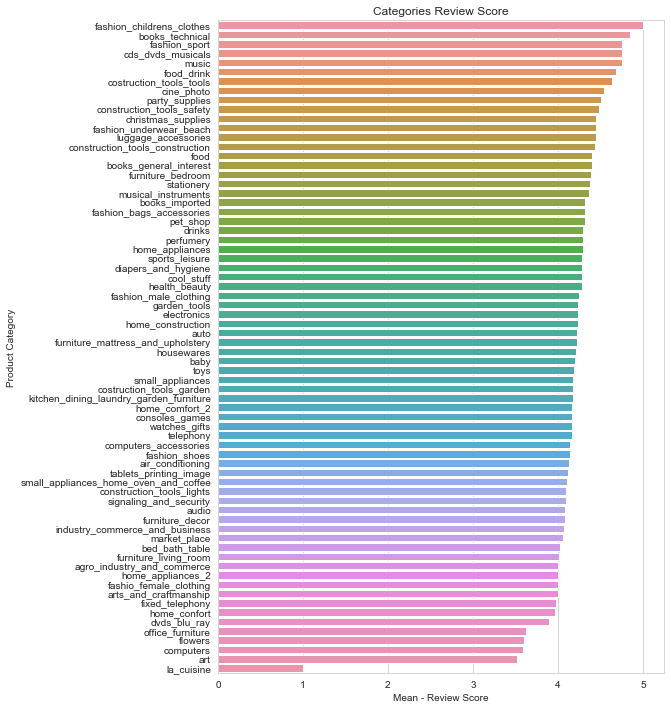

In [36]:
#Visualising the mean review score per. product category.
plt.figure(figsize=[8,12])
ax = sns.barplot(x="Mean - Review Score", y="Product Category Name English", data=avg_score_per_category)
ax.set_title('Categories Review Score')
ax.set_ylabel('Product Category')
plt.show()

Almost all product categories have a mean review score above 4. This can be traced back to the characteristics of the review score variable since a tendency towards the higher ratings were identified here. The visualisation thereby showcases that there are not that big of a difference of the ratings between product categories. This will be investigated further by using the finding that there is a remarkable difference in the number of reviews among the product categories, and only plotting product categories with more than 100 reviews and their mean review score.

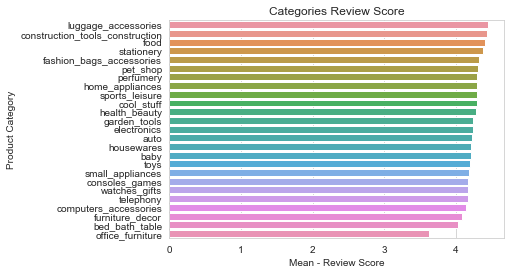

In [37]:
#Visualising the mean review score per. product category, for product categories with more than 100 reviews.
avg_score_per_category_ReviewCount = avg_score_per_category[avg_score_per_category['Count - Review Score'] > 100]
avg_score_per_category_ReviewCount = avg_score_per_category_ReviewCount.sort_values(by='Mean - Review Score', ascending=False)
plt.figure()
ax = sns.barplot(x="Mean - Review Score", y="Product Category Name English", data=avg_score_per_category_ReviewCount)
ax.set_title('Categories Review Score')
ax.set_ylabel('Product Category')
plt.show()

This supports the earlier findings further and does not showcase any notable differences in review score per. product category.
In order to be sure, that the same pattern exists within products, the products and their review score will be visualised below But to make sure they are comparable, only products with more than 25 reviews will be used.


In [38]:
#Review Score per. product with more than 25 reviews.
Score_per_product = dfRS.groupby('product_id', as_index=False).agg({'review_score': ['count', 'mean']})
Score_per_product.columns = ['Product ID', 'Count - Review Score', 'Mean - Review Score']
Score_per_product = Score_per_product[Score_per_product['Count - Review Score'] > 25]
Score_per_product = Score_per_product.sort_values(['Mean - Review Score'],ascending=False).reset_index(drop=True)

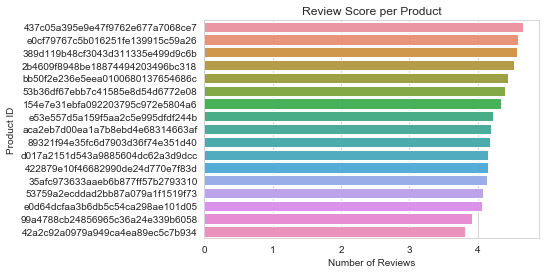

In [39]:
#Visualisation of Review Score per. product with more than 25 reviews.
plt.figure()
ax = sns.barplot(x="Mean - Review Score", y="Product ID", data=Score_per_product)
ax.set_title('Review Score per Product')
ax.set_ylabel('Product ID')
ax.set_xlabel('Number of Reviews')
plt.show()

It also supports the earlier findings and shows that there is a tendency towards high ratings.

### 2.1.5 Review Score Over Time


Although there is a tendency towards higher review scores, it is of interest to see how the review scores have developed through time. Furthermore, it is interesting to determine whether there exist deviation in the score depending on when a review is done. <br>
Firstly, the timestamp needs to be parsed, thereby, generating new variables corresponding to; Year, Month and Day.

In [40]:
#Generating new variables for year, month and day.
dfRS['review_creation_year'] = dfRS.review_creation_date.apply(lambda x: x.year)
dfRS['review_creation_month'] = dfRS.review_creation_date.apply(lambda x: x.month)
dfRS['review_creation_dayofweek'] = dfRS.review_creation_date.apply(lambda x: x.dayofweek)
dfRS['review_creation_day'] = dfRS['review_creation_dayofweek'].map(
    {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
dfRS['review_creation_mon'] = dfRS.review_creation_date.apply(lambda x: x.month).map(
    {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

With the parsing done the investigation of review score and time can be started. Firstly, a general investigation of the development of review scores over time. The dataset consists of observation from 2016 to 2018.

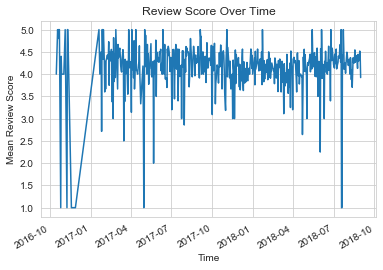

In [41]:
#Visualising the development of the reveiw score over time.
ax = dfRS.groupby(["review_creation_date"])["review_score"].mean().plot()
ax.set_title('Review Score Over Time')
ax.set_xlabel("Time")
ax.set_ylabel("Mean Review Score")
plt.show()

From the plot, it can be concluded that generally from 2017 an beyond have the mean review score been around 4. There are occasionally som outlier review scores; these can be the result of only one review on the given day. Now a plot of the years and their review score is made.


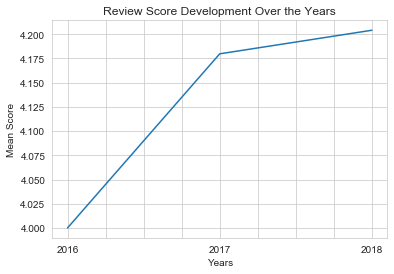

In [42]:
#Review score development over the years.
ax = review_by_time= dfRS.groupby(["review_creation_year"])["review_score"].mean().plot()
ax.set_title('Review Score Development Over the Years')
ax.set_xlabel("Years")
ax.set_ylabel("Mean Score")
ax.set_xticklabels( ('','2016','','','','2017','','','','2018') )
plt.show()

The plot showcase that the review score has increased gradually over the years from 4.0 in 2016 to just above 4.20 in 2018. Thus, the high review scores are not something new for Olist. However, there may still exist deviations in the review score, depending on when the review is made. This will be investigated in regards to which month and which day of the week the review is made.

First, reviewing the score development over the months.

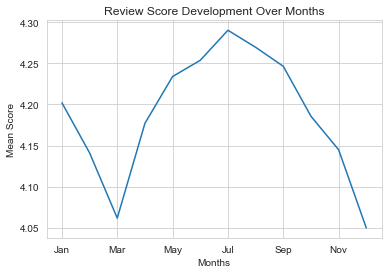

In [43]:
#Review score development over months.
month_order = ['Jan','Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = review_by_time= dfRS.groupby(["review_creation_mon"])["review_score"].mean().loc[month_order].plot()
ax.set_title('Review Score Development Over Months')
ax.set_xlabel("Months")
ax.set_ylabel("Mean Score")
plt.show()

Next, reviewing the score development through the days of the week.

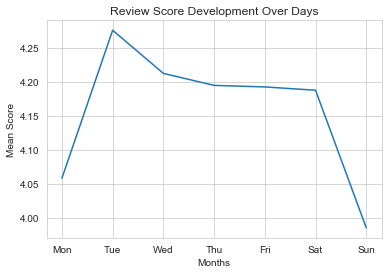

In [44]:
day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
ax = review_by_time= dfRS.groupby(["review_creation_day"])["review_score"].mean().loc[day_order].plot()
ax.set_title('Review Score Development Over Days')
ax.set_xlabel("Months")
ax.set_ylabel("Mean Score")
plt.show()

Once again, it is deduced that the data consists of high review scores, as all months and all days of the week have mean review scores above 3.9. However, there are some notable differences between the different months and also between the different days. Sunday have the lowest review scores, with a mean score below 4.0. For the months it is seen that December is the worst performing month with a rating of 4.05. Thus, it can be concluded that the month and day the review is given do affect the score. There can be a lot of different reason for these patterns regarding the month and day of the week. One could think that people have higher expectations and find the order more critical in December due to Christmas. A reason for the pattern in weekdays could be that people usually are less happy on Sundays due to a new work week is about to start. These potential reasons are just speculation, and the only thing that can be backed by the Olist data is that Sunday has lower review scores than the other days and that December is the month with the lowest review score. Nonetheless, when making such interpretation, one should remember that the data basis are more significant for the summer months than the winter months since the data is collected from 10th of October 2016 to 29th of August 2018.

### 2.1.6 Review Score and Delivery Time

An investigation of whether the delivery time influences the review score will now be conducted. The idea prior to the investigation is that the faster the order is delivered, the more positive is the review score. Another expectation is that the more days the order is delayed, the worse the review score. <br>
For cheeking this, two parameters will be investigated:
- The time between order approved and delivered to the customer
- The difference between the time delivered and to the estimated delivered time <br>

Firstly, two parameters are defined to make the calculations.

In [45]:
#Defining the two parameters.
dfRS["Approved_To_Delivered"]= dfRS["order_approved_at"] - dfRS["order_delivered_customer_date"]
dfRS["Delivered_To_Estimated"]= dfRS["order_estimated_delivery_date"] - dfRS["order_delivered_customer_date"]

#They have to be transformed from datatype to int. Furthermore the abs. is taken to make it easier to interpret.
dfRS["Approved_To_Delivered"]= dfRS["Approved_To_Delivered"].astype('timedelta64[D]').astype(int).abs()
dfRS["Delivered_To_Estimated"]= dfRS["Delivered_To_Estimated"].astype('timedelta64[D]').astype(int)

With the parameters defined, the investigation of how they affect the review score can be made. First of all, investigating how the time from order approved to order delivered affects the review score. It is done by plotting the review score according to the time between order approved, and order delivered.

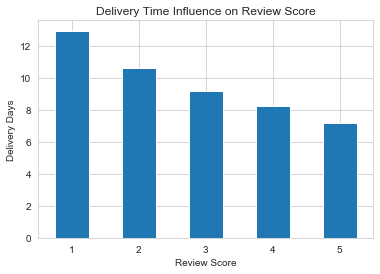

In [46]:
#review score according to the time between order approved and delivered to the customer.
ax = dfRS.groupby(["review_score"])["Approved_To_Delivered"].mean().plot(kind='bar', rot=0)
ax.set_title('Delivery Time Influence on Review Score')
ax.set_xlabel("Review Score")
ax.set_ylabel("Delivery Days")
plt.show()

It is seen that the more days it takes to deliver the order, the worse is the review score. Consequently, Olist should seek to lower the delivery time, to higher their chances for a high review score. <br>

Now an investigation of how the difference between the estimated delivery date and the actual delivery date affects the review score will be conducted. It is done by plotting the review score according to the time between estimated delivery and actual delivery. <br>
Firstly, it will be checked whether the orders from Olist generally are delayed, by plotting the time between estimated delivery and actual delivery.


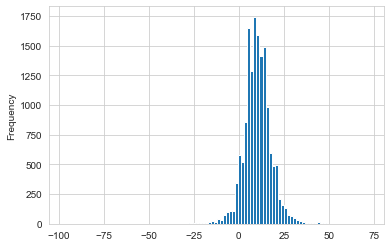

In [47]:
#Cheeking how many deliveries that actually are delayed.
((dfRS['order_estimated_delivery_date'] - dfRS['order_delivered_customer_date']) / 
 (np.timedelta64(1, 'D'))).plot(kind='hist', bins=100)
plt.show()

A positive value indicates that the actual delivery date was before the estimated delivery date, and a negative value indicates that the order was delayed. <br>
Therefore, the plot showcase that Olist delivers on time and actually mostly before the estimated delivery date. This is important when investigating how the review score is influenced by the difference between the estimated delivery and actual delivery.


The review score according to the time between estimated delivery and actual delivery will now be plotted.

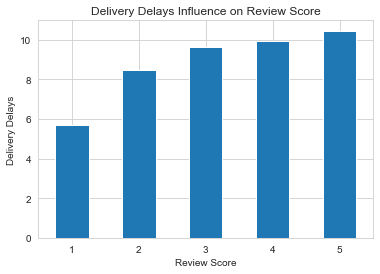

In [48]:
#review score according to the time between the predicted delivery and actual delivery.
ax = dfRS.groupby(["review_score"])['Delivered_To_Estimated'].mean().plot(kind='bar', rot=0)
ax.set_title('Delivery Delays Influence on Review Score')
ax.set_xlabel("Review Score")
ax.set_ylabel("Delivery Delays")
plt.show()

The plot shows that the delivery time does influences the review score since the higher the value, the higher the review score. Therefore, Olist has to keep aiming for delivery at least on time or even keep up delivering early, as early deliveries influence the review score positively.

### 2.1.7 Purchase Patterns

In the following, an examination of when people are buying at Olist will be conducted to try and uncover potential patterns. The examination will be made via the payment value and number of orders.
Firstly, a parsing of the timestamp variable will be made, thereby generating new variables corresponding to; Year, Month and Day.

In [49]:
#Generating new variables for year, month and day.
dfRS['order_purchase_timestamp_pure'] = pd.to_datetime(dfRS['order_purchase_timestamp']).dt.date
dfRS['order_purchase_timestamp_year'] = dfRS.order_purchase_timestamp.apply(lambda x: x.year)
dfRS['order_purchase_timestamp_month'] = dfRS.order_purchase_timestamp.apply(lambda x: x.month)
dfRS['order_purchase_timestamp_dayofweek'] = dfRS.order_purchase_timestamp.apply(lambda x: x.dayofweek)
dfRS['order_purchase_timestamp_day'] = dfRS['order_purchase_timestamp_dayofweek'].map(
    {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
dfRS['order_purchase_timestamp_mon'] = dfRS.order_purchase_timestamp.apply(lambda x: x.month).map(
    {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

Now the investigation of purchases over time can be made, and it starts with a general investigation of the development over time.

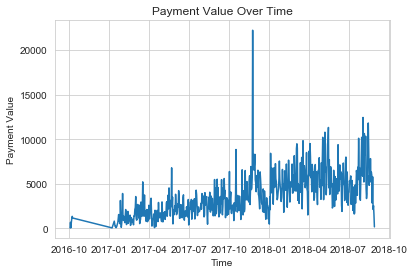

In [50]:
#Visualising the development of the payment value over time.
ax = dfRS.groupby(["order_purchase_timestamp_pure"])["payment_value"].sum().plot()
ax.set_title('Payment Value Over Time')
ax.set_xlabel("Time")
ax.set_ylabel("Payment Value")
plt.show()

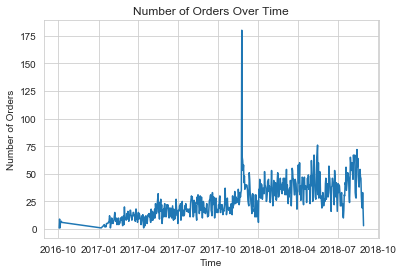

In [51]:
#Visualising the development of the number of orders over time.
ax = dfRS.groupby(["order_purchase_timestamp_pure"])["order_id"].count().plot()
ax.set_title('Number of Orders Over Time')
ax.set_xlabel("Time")
ax.set_ylabel("Number of Orders")
plt.show()

As expected, the pattern is the same for payment value and the number of orders, for this reason for the future investigation of purchase patterns, only the number of orders will be utilised. Regarding the visualisation, it seems to be pretty consistent with an upward trend. However, there is a big deviation in late 2017. This deviation will quickly be investigated.

In [52]:
#Cheecking what day the deviation is.
SalesPeakOrders = dfRS.groupby('order_purchase_timestamp_pure')['order_id'].count().reset_index()
SalesPeakOrders.sort_values(by=['order_id'], ascending=False)

order_purchase_timestamp_pure  order_id
322                    2017-11-24       180
495                    2018-05-16        76
585                    2018-08-14        72
494                    2018-05-15        68
577                    2018-08-06        67
..                            ...       ...
98                     2017-04-14         1
22                     2017-01-28         1
7                      2017-01-07         1
2                      2016-10-05         1
0                      2016-10-03         1

[601 rows x 2 columns]

It is seen that the deviation is the 24th of November in 2017, on this day Olist had more than double the orders compared to the second best selling date. Via some googling, it was found that this day was Black Friday in 2017.

Now it will be investigated whether there exist deviations in the number of orders over the months.

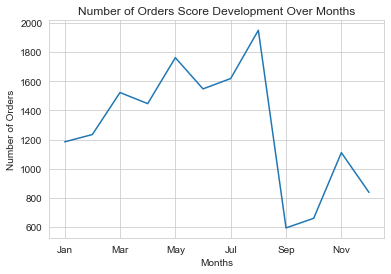

In [53]:
#Review score development over months
month_order = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = orders_by_time = dfRS.groupby(["order_purchase_timestamp_mon"])["order_id"].count().loc[month_order].plot()
ax.set_title('Number of Orders Score Development Over Months')
ax.set_xlabel("Months")
ax.set_ylabel("Number of Orders")
plt.show()

Concerning sales among the months, there are some interesting findings. There exist remarkable differences in the number of orders among the months of the year. September is the month with the least total number of sales with less than 800, and August is the month with most total sales, with more than 2200. Moreover, to some surprise, December and November is the month with low sales, even though it previously have been deduced that November has the day with most sales of all time. However, before putting too much emphasis on these findings, it is important to remember that the data is from the 10th of October 2016 to 29th of August 2018. Thereby, only having one year of data for September and two years of data for every other month. Thus, the data basis for the month is not the same.

Next up is to see how the total amount of orders develops during the different days of the week.

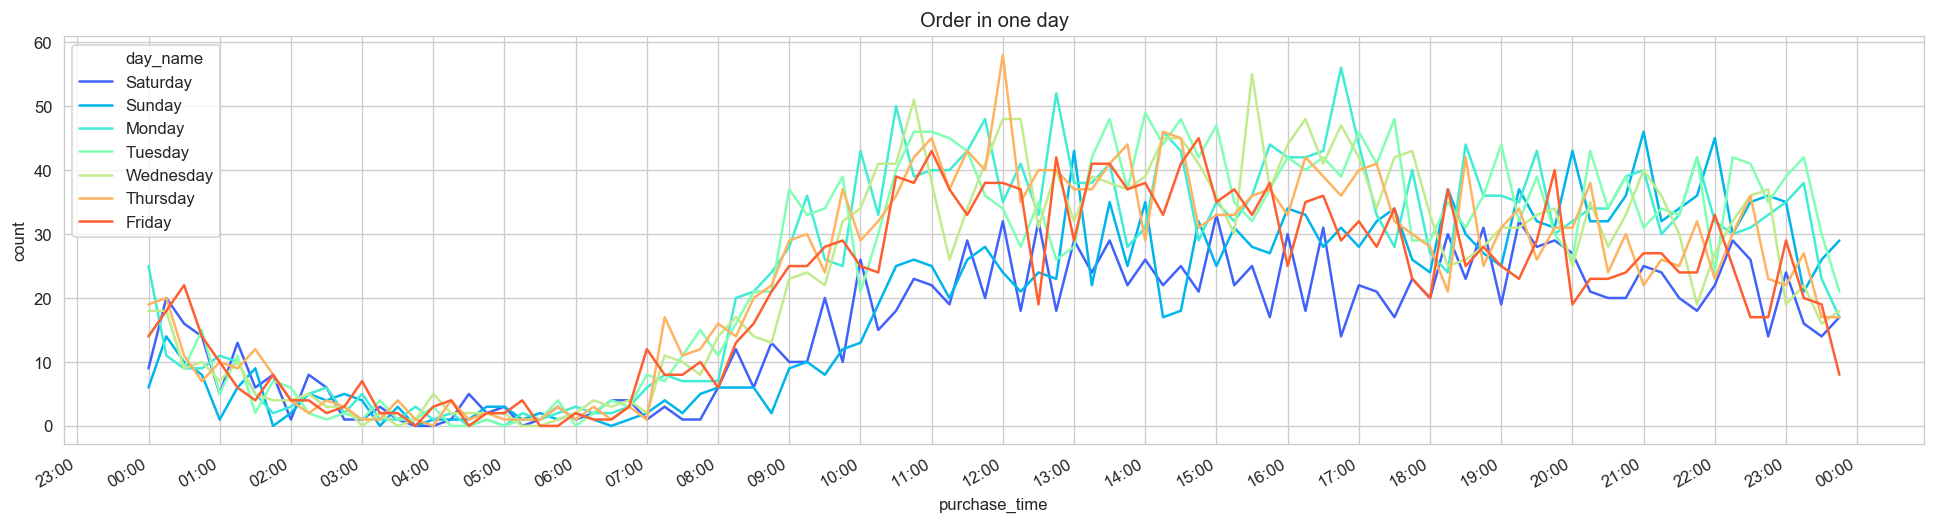

In [54]:
#Total orders in one day
orderday = dfRS.sort_values('order_purchase_timestamp').reset_index(drop = True)
daysales = orderday.copy()
daysales['day_name'] = daysales['order_purchase_timestamp'].dt.day_name()
daysales = daysales.groupby('day_name').resample('15Min', on = 'order_purchase_timestamp')
['order_id'].nunique().reset_index(name = 'count')
daysales['purchase_time'] = daysales['order_purchase_timestamp'].dt.time
daysales['purchase_time'] = pd.to_datetime(daysales['purchase_time'],format='%H:%M:%S')
daysales = daysales.groupby(['purchase_time', 'day_name'])['count'].sum().reset_index(name = 'count')
f, ax = plt.subplots(figsize = (20, 5), dpi = 120)
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_title('Order in one day')
day_order = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
sns.lineplot(x = 'purchase_time', y = 'count', hue = 'day_name', hue_order = day_order,\
             data = daysales, ax = ax, palette = 'rainbow');
f.autofmt_xdate();

Overall there is a significant downward trend for Friday nights and a significant upward trend for Sunday nights. Further, during the daytime are there most orders in the weekdays. Also, it is seen that Saturday is a day of fewer orders than the other days. Lastly, is there a drop in total orders from 0:00 to 6:00, and from 6:00 until the peak at 12:00 is a rise. From 12:00 to 18:00 is the total amount of orders pretty steady, and from 18:00 until 22:00 is a slight drop.

#### Purchase Patterns - Number of Orders per. product group

A quick investigation of the number of orders concerning product category will now be conducted. Through such an examination, an idea of purchase patterns within product groups will be obtained, and it can be deduced whether some product groups are more in demand than others.

In [55]:
#Calculating number of orders per. product category
orders_per_category = dfRS.groupby('product_category_name_english', as_index=False).agg({'order_id': ['count']})
orders_per_category.columns = ['Product Category Name English', 'Count - Orders']

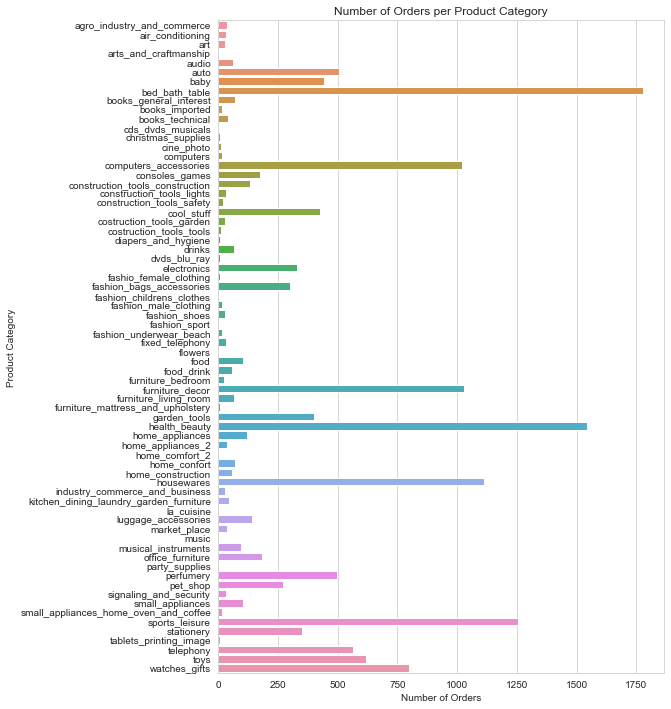

In [56]:
#Visualising number of orders per. product category
plt.figure(figsize=[8,12])
ax = sns.barplot(x="Count - Orders", y="Product Category Name English", data=orders_per_category)
ax.set_title('Number of Orders per Product Category')
ax.set_ylabel('Product Category')
ax.set_xlabel('Number of Orders')
plt.show()

A remarkable difference in the number of orders per. product category is noticed. The top 25 and bottom 25 will now be showcased in two individual plots to get a more suitable overview of the difference.

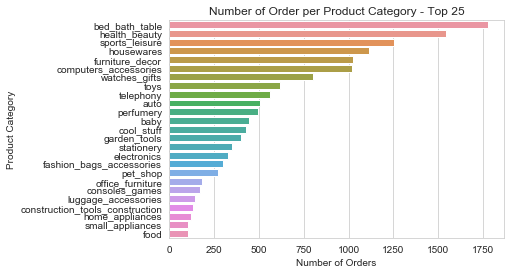

In [57]:
#Top 25 product categories measured on number of orders in the category.
orders_per_category_Top25 = orders_per_category.nlargest(25, 'Count - Orders')
plt.figure()
ax = sns.barplot(x="Count - Orders", y="Product Category Name English", data=orders_per_category_Top25)
ax.set_title('Number of Order per Product Category - Top 25')
ax.set_ylabel('Product Category')
ax.set_xlabel('Number of Orders')
plt.show()

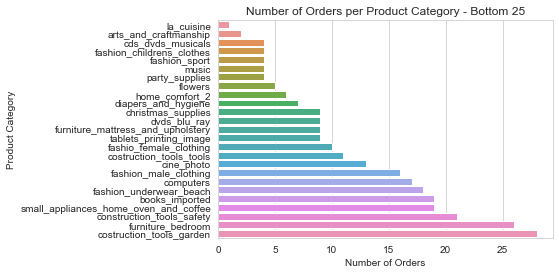

In [58]:
#Bottom 25 product categories measured on number of orders in the category.
orders_per_category_Bottom25 = orders_per_category.nsmallest(25, 'Count - Orders')
plt.figure()
ax = sns.barplot(x="Count - Orders", y="Product Category Name English", data=orders_per_category_Bottom25)
ax.set_title('Number of Orders per Product Category - Bottom 25')
ax.set_ylabel('Product Category')
ax.set_xlabel('Number of Orders')
plt.show()

From the two plots, it is illuminated that there exists a notable difference in the number of orders per. product category. Therefore, it can be deduced some product groups are more in demand than others. However, this fact could partly be due to the difference in the number of products per. product category, which has been investigated earlier, and also the long tail phenomena.

### 2.1.8 Final Remarks - Descriptive Analysis

The descriptive analysis gave an insight into the review score variable, and the main finding is that the distribution of the review scores is very centred towards the high end of the rating scale, and the median is a value of 5 and the mean is 4.19. Thereby indicating that the general scores are very high. <br>

Another crucial finding from the descriptive analysis is that only 6% of the customers are returning customers; this means that 94% of the customers make one order and is after that never seen again. This provides some difficulties when making recommender systems, e.g. it is not possible to make user average mean as a baseline model. Moreover, it only emphasises the need for a good recommender system at Olist, as it could help them retain customers. <br>

Further, a test of what may affect the review score was conducted, and here were detected some interesting findings. <br>
Firstly, it was illuminated that the product category was not a significant factor, even though there were remarkable differences in how many products there is per. product category and how many reviews each product category has. Almost all product categories had high review scores from 4 and up. A reason for this can be traced back to the distribution of the review score. Thus, it supports that the review score is centred on the high end of the scale. <br>
Further, this analysis illuminated that Olist has more than 9000 products which give them a widespread thing in the e-commerce industry, the long tail phenomena, which a recommender system also would help tackle.<br>
Secondly, it was identified that the ratings over time had increased from around 4.0 to around 4.20, and that ratings in December and on Sundays generally were lower. Therefore, the time of a review does influence the review score. However, the scores were still generally in the high end of the scale. <br>
Thirdly, it was deduced that the delivery time does influences the review score, so the faster the delivery, the better the review score. Therefore, Olist must aim at lowering the delivery time to higher their chances for a high review score. <br>
Lastly, an investigation of the purchases patterns was made. From this, a slow upward trend indicating sales has risen over time were identified. Also, it was deduced that Black Friday in 2017 was a really good day for Olist, due to an enormous high sales number. Further, it was identified that during daytime are most orders in the weekdays and that Friday nights have a significant downward trend and Sunday nights have an upward trend. Further, a drop in sales from 0:00 to 6:00, and a rise in sales from 6:00 to 12:00 where the peak for sales is, were illuminated. From 12:00 to 18:00 is the total amount of orders pretty steady, and from 18:00 until 22:00 is a slight drop. Finally, it was deduced that Saturdays generally were lower in order numbers than other days of the week.<br>

Thereby, an understanding of the purchase patterns and the review score has been obtained. Finally, was it illuminated that Olist does need a recommender system to retain their customers and get a higher number of returning customers, and for tackling the long tail phenomena.


## 2.2 Preparing for Modelling

With the descriptive analysis done, the final configuration, before the modelling of the recommender systems, can be made. These configurations involve, load the packages used to make the recommender systems, convert the data to the right format, split it into test set and training set, and define the evaluation methods. 

### 2.2.1 Loading Recommender Packages - Surprise

For making the different recommender systems, the Python sckit package [`surprise`](http://surpriselib.com/) will be utilised. It is easy to use and provides tools to analyse, evaluate and compare different recommender system algorithms. It is loaded below.

In [59]:
#Loading the the necessities from the surprise package.
from surprise import Dataset
from surprise.model_selection import cross_validate, GridSearchCV
from surprise import Reader
from surprise.model_selection import train_test_split

With [`surprise`](http://surpriselib.com/) loaded, the rest of the preparations needed can be made.

### 2.2.2 Convert to the right format

For utilising `surprise` and its many useful tools, the data need to be in a specific format. Below the dataset is converted to the proper format; thus, securing the tools from the package can be used.

In [60]:
#Define reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dfRS[['customer_unique_id', 'product_id','review_score']], reader)

The dataset is now converted to the correct format, and the next step is to split it into a test set and training set.

### 2.2.3 Train/test split

The dataset will be split into a training set and test set, to give an unbiased estimate of the different models' performance. The training set will be the actual dataset that used to train the models, and the test dataset is used to evaluate the models, and will only be used once a model is completely trained.
The spilt of the data will be an 80/20, meaning 80% of the original dataset becomes the training dataset, and the last 20% becomes the test dataset. <br>

One could have considered splitting the data into three parts, train, test and validation. This would give the possibility to tune the models on the validation set, but this will not be done in this project, as it is found outside the scope.


In [61]:
#Importing the test_train_split from sklearn to make the train and test split.
from sklearn.model_selection import train_test_split

#Splitting the data into train and test by 80/20.
dfRS_train, dfRS_test = train_test_split(dfRS, test_size = 0.2, random_state=42)

In [62]:
#Showcasing number of training samples.
print("number of training samples:", dfRS_train.shape[0])

#Showcasing number of test samples.
print("number of test samples:", dfRS_test.shape[0])

number of training samples: 12369
number of test samples: 3093


The test set and training set also need to be usable with the surprise package. This is secured in the following.

In [63]:
#Making the training set applicable with the surprise package.
data_train = Dataset.load_from_df(dfRS_train[['customer_unique_id', 'product_id','review_score']], reader)
data_train_surprise = data_train.build_full_trainset() 

#Making the test set applicable with the surprise package.
data_test = Dataset.load_from_df(dfRS_test[['customer_unique_id', 'product_id','review_score']], reader)

#Making the customer id usables when making predictions.
customer_unique_id_true = dfRS_test['customer_unique_id'].values

#Making the product id usables when making predictions.
product_id_true = dfRS_test['product_id'].values 

Now the test set and training set has been finalised, and next up is to define the performance evaluation.

### 2.2.4 Performance Evaluation

It is important to be able to evaluate how well the different models perform, for this different evaluation method exists for recommender systems, and these can be divided into two different categories:
- Human-based evaluation <br>
Is used to assess properties such as diversity and explainability of the recommendations. These can not be directly tested by different metrics but must be assessed and evaluated by humans. Here field-testing is applicable.
- Metrics-based evaluation <br>
Can be used if the recommender system outputs numeric prediction values and non-numeric values. Numeric values are assessed via an error measurement metric. Non-numeric values can be evaluated by estimating the proportion of recommended items that suited the goal. <br>

The metrics-based evaluation will be used solely, as for this project, it is challenging to make the human-based evaluation due to Olist location in Brazil. However, it is highly advisable and recommendable for Olist to utilise field-testing, alongside the metric-based evaluation. Thereby, fully assess whether the recommender systems provide any business value for Olist. <br>

The paper _"Recommendations with A Purpose"_ highlightes that the metric of choice should be aligned with the operational system task the model is being designed for. In this project, the rating prediction problem is being addressed. For this problem, the paper points to the root-mean-square error (RMSE) as the best metric. Further, as outliers are important in this project, due to the tendency towards higher ratings, RMSE is a perfect choice. <br>
In the business context, the goal is to have as low an RMSE error as possible. Reason being, the lower the RMSE, the more precise is the recommender system and the better become the recommendations. The interpretation of the RMSE score is that a score of 1, means the recommender system is predicting ${\displaystyle \pm}1$ star in ratings from the actual rating. <br>

One could also have made use of measures to go along with the RMSE, such as fit-time, but it is chosen not to in this project. Reason being that Olist is more interested in a precise and good recommender system, which can help them retain their customers. For this, they need the most precise recommender system possible, and the time it takes to fit is not interesting in that regard. <br>

A function for calculating the RMSE and a function to make a box plot to visualise the RMSE score will be defined below. The two functions are from the "Recommender Systems" notebook provided by Stanislav Borysov.

In [64]:
#Function for calculating the RMSE
def RMSE(y_true, y_pred):
    return np.linalg.norm(y_true - y_pred) / np.sqrt(len(y_true))

In [65]:
#Function for making a box plot to visualize the RMSE
def MakeBoxplot(y_true, y_pred, title):
    data = [y_pred[y_true == (x*0.5+0.5)] for x in range(10)]
    fig = plt.figure(figsize=(5, 5))
    plt.boxplot(data)
    min_a, max_a = 0., 5.5
    plt.xlim((min_a, max_a))
    plt.ylim((min_a, max_a))
    plt.plot([min_a, max_a * 2], [min_a, max_a], ls='--', color='blue', linewidth=1.0)
    plt.xticks(range(12), [x*0.5 for x in range(12)])
    plt.xlabel('True Rating')
    plt.ylabel('Predicted Rating')
    plt.title(title)
    plt.show()

For using the RMSE, observed values which can be used to compare the predicted values of the different recommender systems are needed. The observed values will be the same for all models, and thereby the evaluation is conducted on the same basis. This basis will be called `y-true` and is calculated below.

In [66]:
#Obtaining the observed values for the RMSE calculation
y_true = dfRS_test['review_score'].values

With the last step done in the preparation, the modelling can now start.

## 2.3 Baseline Models

For comparing the different models, in the end, their performance score will be compared. But one would also like to know whether the performance of the different models is high or low and to help one evaluating this a reference point is needed. Shortly put, a baseline is needed.<br>
In this project, three baseline models to produce the baseline will be used. They do not do much work but are still useful for comparing accuracies. The baseline models are elementary recommender systems and can, therefore, be recommended for Olist, if they are found to be the best model. <br>
The three baseline models are:
    - Global Mean, 
    - NormalPredictor, 
    - BaselineOnly.
In the following, each of the three models will be walkthrough individually. Their concept will be explained, they will provide predictions, and their performance will be evaluated.


Firstly, the models are imported.

In [67]:
#Importing algortihms for the different baseline models.
from surprise import SlopeOne, NormalPredictor, BaselineOnly

### 2.3.1 Global Mean

The baseline model Global Mean assumes that the review scores can be predicted by using the global average score of all ratings given. Thereby, it will predict the same score for everything, as it is just the mean of every rating. <br>
Therefore, the first thing to do for making predictions via Global Mean is to calculate the overall average score.


In [68]:
#Calculating the global mean.
global_mean = dfRS_train['review_score'].mean()

The overall average rating is hereby calculated, and the prediction will be made below.

In [69]:
#Empty arry for storring the predictions.
y_pred = []

#Makeing the predictions via the global mean model.
for i, row in dfRS_test.iterrows():
    y_pred.append(global_mean)
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)

As the predicted values are calculated, the array will quickly be printed to see some of the predicted values.

In [70]:
#Printing the predicted values
y_pred

array([4.19775245, 4.19775245, 4.19775245, ..., 4.19775245, 4.19775245,
       4.19775245])

As the predicted values and the observed values now are obtained, the RMSE can be calculated.

In [71]:
#Calculating the RMSE for the Global Mean.
Global_Mean_Error = RMSE(y_true, y_pred)

The RMSE for the Global Mean model will now be shown alongside a box plot of its performance.

Global Mean = 4.197752445630204
RMSE = 1.2716721644537181


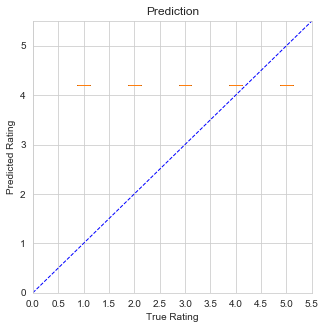

In [72]:
#Printing the RMSE and Global Mean.
print("Global Mean =", global_mean)
print("RMSE =", Global_Mean_Error)

#Making box-plot to visualise the RMSE score for the Global Mean.
MakeBoxplot(y_true, y_pred, 'Prediction')

The Global Mean model has an RMSE score of 1.27. This score and the box plot indicates that it is an okay predictor as it is not way off, and in general predicts ${\displaystyle \pm }1$ star in ratings. A reason for this is the amount of high ratings. In the descriptive analysis, it was illuminated that the data was not that well distributed among the different scores and that the median actually was 5. Therefore, a Global Mean predictor will perform okay, as the ratings are all very much alike. All in all, it is an okay predictor, and the Global Mean model is now the model to beat for all the other models, as it is the best performing model at the moment.

### 2.3.2 NormalPredictor

NormalPredictor is an algorithm predicting a random rating based on the distribution of the trainset, which is assumed to be normal. Thus, the prediction is generated from a normal distribution and are estimated from the trainset using Maximum Likelihood Estimation. Consequently, the prediction value is given randomly according to the distribution characteristics of the trainset. <br>
The algorithm is defined below.


In [73]:
#Defining the NormalPredictor.
algo = NormalPredictor()

The algorithm is now defined, and the predictions via the NormalPredictor model can be made.

In [74]:
#Train the NormalPredictor on the whole trainset.
algo.fit(data_train_surprise)

#Empty arry for storring the predictions.
y_pred = []

#Makeing predictions via the NormalPredictor.
for customer_unique_id, product_id in zip(customer_unique_id_true, product_id_true):
    r = algo.predict(customer_unique_id, product_id, verbose=False).est
    y_pred.append(r)
y_pred = np.array(y_pred)

As the predicted values are calculated, the array will quickly be printed to see some of the predicted values.

In [75]:
#Printing the predicted values
y_pred

array([5.        , 3.03507317, 5.        , ..., 3.44670187, 4.28635856,
       3.74827869])

As the predicted values and the observed values now are obtained, the RMSE can be calculated.

In [76]:
#Calculating the RMSE for the NormalPredictor.
NormalPredictor_error = RMSE(y_true, y_pred)

The RMSE for the NormalPredictor model will now be shown alongside a box plot of its performance.

RMSE = 1.6175357356043447


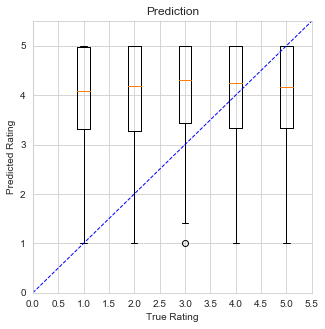

In [77]:
#Printing the RMSE.
print("RMSE =", NormalPredictor_error)

#Making box-plot to visualise the RMSE score for the NormalPredictor.
MakeBoxplot(y_true, y_pred, 'Prediction')

The NormalPredictor model has an RMSE score of 1.61. This score and the box plot indicates that it performed worse than the Global Mean, and in general predicts ${\displaystyle \pm }1.5$ star in ratings. It makes sense when looking at the model specification, as the NormalPredictor assumes the data is normally distributed. The review scores are not normally distributed at all, which were concluded in the descriptive analysis, but centred among the high scores, which is more favourable for the Global Mean. Consequently, it does make sense that the NormalPredictor performs worse than the Global Mean model. Thus, the Global Mean model is still the model to beat.

### 2.3.3 BaselineOnly

BaselineOnly is an algorithm predicting the baseline estimate by taking the overall average rating ($\mu$), adds the observed deviation of the user from the average ($b_u$), and the observed deviation of an item from the average ($b_i$). The final result from this is then the prediction. Consequently, the BaselineOnly is customary to adjust the data by accounting for the user and item effects, which is encapsulated within the baseline estimates. <br>
The formula for the BaselineOnly is the following: 
$$b_{ui} = \mu + b_u + b_i $$
The algorithm is defined below.


In [78]:
#Defining the BaselineOnly.
algo = BaselineOnly()

The algorithm is now defined, and the predictions via the BaselineOnly model can be made.

In [79]:
#Train the BaselineOnly on the whole trainset.
algo.fit(data_train_surprise)

#Empty arry for storring the predictions.
y_pred = []

#Makeing predictions via the BaselineOnly.
for customer_unique_id, product_id in zip(customer_unique_id_true, product_id_true):
    r = algo.predict(customer_unique_id, product_id, verbose=False).est
    y_pred.append(r)
y_pred = np.array(y_pred)

Estimating biases using als...


As the predicted values are calculated, the array will quickly be printed to see some of the predicted values.

In [80]:
#Printing the predicted values
y_pred

array([4.00937366, 4.19775245, 4.19775245, ..., 4.19775245, 4.2801836 ,
       4.08701367])

As the predicted values and the observed values now are obtained, the RMSE can be calculated.

In [81]:
#Calculating the RMSE for the BaselineOnly.
BaselineOnly_error = RMSE(y_true, y_pred)

The RMSE for the BaselineOnly model will now be shown alongside a box plot of its performance.

RMSE = 1.256782554715323


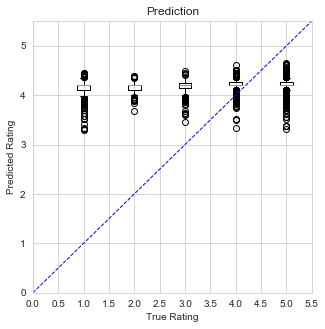

In [82]:
#Printing the RMSE.
print("RMSE =", BaselineOnly_error)

#Making box-plot to visualise the RMSE score for the BaselineOnly.
MakeBoxplot(y_true, y_pred, 'Prediction')

The BaselineOnly model has an RMSE score of 1.26. This score and the box plot indicates that it performs better than the Global Mean model, and predicts ${\displaystyle \pm }1$ star in ratings. It is the new model to beat. <br>
That the BaselineOnly is the new best performing model does not come as a surprise. Reason being, it builds on the Global Mean, by using the global average and then adds item deviation and user deviation. Thus, it must perform better than the Global Mean model since it has more parameters to try and adjust for the deviation from the global mean.


### 2.3.4 Final Remarks - Baseline Models

In the above section, three different baseline models were generated. The results of these models should be seen as a reference point for future models to try and beat. The performance of all three models was evaluated by looking at their RMSE score. The RMSE for the three models are the following:

Model  | RMSE Score
------------- | -------------
Global Mean  | 1.27
NormalPredictor  | 1.62
BaselineOnly  | 1.26

From the results, it can be concluded that they generally speaking predict ${\displaystyle \pm }1$ star in ratings, and the best performing model is the BaselineOnly with an RMSE Score of 1.26. The BaselineOnly is, therefore, the model to beat for future models. <br>
The results are not of any surprise, as the BaselineOnly model is the model best suited for the review score data. <br>
The review scores are somewhat centred towards the high end of the scale, which makes it not normally distributed. Hence, the NormalPredictor will not perform well. The Global Mean model only takes the global mean into account, which for the data is somewhat an excellent prediction, as the median is a value of 5. But the BaselineOnly is a kind of extension of the Global Mean, as it uses the global mean but also adds the observed deviation of the user and the observed deviation of the item. Thereby, it can easier adjust to the deviation among observations than the Global Mean model and must perform better.

## 2.4 Collaborative Filtering

Collaborative filtering methods are exclusively based on past interaction between items and users. Such interactions are in a user-item interactions matrix, which is the past interactions stored in matrix form, and utilised to make recommendations. Therefore, collaborative filtering methods do not need anything else than historical data of what item a user likes or dislikes, and it assumes that users who agreed in the past also will agree in the future. So, the main idea is that the past interactions are satisfactory to detect patterns of similar users and items and make predictions based on these. <br>
A key advantage of the collaborative filtering methods is that they do not need any information about users or items; therefore, they can be used in a lot of different situations. Additionally, the more interaction there is, the more accurate will the recommendations be. A drawback of the collaborative filtering methods is that they only consider past interactions for making recommendations. Thus, they suffer from what is called the “cold start problem”. The problem is that it is impossible to make recommendations to new users or new items and that users and items with few interactions are difficult to handle. <br>

In this section, different collaborative filtering methods for making recommender systems will be investigated. Firstly, the surprise package will be utilised to make different recommender systems that try to predict ratings for a given customer in order to be able to recommend items which the customer will rate highly. Nine collaborative filtering methods will be used, and eight of these will be tried to be optimised via a grid search. Their performance will be evaluated, and the best performing model will be detected and recommended for Olist. Following this, a solution for Olist to the “cold start problem”, which collaborative filtering methods suffer, will be presented.

### 2.4.1 Defining the Models

First and foremost, the different recommender systems that will be utilised in the following will be explained.

**SVD:** <br>
SVD is Singular Vector Decomposition and is a matrix factorisation model. Such models map both items and users to a joint factor space with dimensionality _f_. Thereby, are user-item interactions modelled as inner products in that space. Rating explanation via the latent space is by characterising both users and products on factors automatically inferred from user ratings. <br>
Therefore, is each user associated with a vector $p_{u}$ and each item with a vector $q_{i}$.<br>

The prediction for SVD, $\hat{r}_{ui}$ is: <br>
$$ \hat{r}_{ui} = \mu + b_{u} + b_{i} + q_{i}^T p_{u} $$

$q_{i}$ measures the extent to which an item possesses the factors, and the $p_{u}$ measures the extent of interest the user has in the item. $ q_{i}^T p_{u} $ captures the interaction between item and user — the overall interest of the user in characteristics of the item. $b_{u}$ is the baseline of the user, and $b_{i}$ is the baseline of the item. $\mu$ is the overall average rating. <br>
For one to learn the model parameters minimisation of the regularised squared error is necessary. <br>

For obtaining a more in-depth understanding and explanation of the SVD, see _“Francesco Ricci, Lior Rokach, Bracha Shapira, and Paul B. Kantor. Recommender Systems Handbook. 1st edition, 2010.”_ <br>

**SVDpp:** <br>
SVDpp is the SVD++ which is an extension of SVD taking into account implicit ratings. The prediction accuracy should improve when such implicit ratings are considered since it provides an additional indication of the user preferences. <br>
The prediction for SVD++, $\hat{r}_{ui}$ is: <br>
$$ \hat{r}_{ui} = \mu + b_{u} + b_{i} + q_{i}^T * \left (p_{u}+ |R(u)|^{\frac{1}{2}} * \sum_{j \in R(U)} y_{i} \right) $$

The biggest deviation from the SVD formula is that a user is now modelled as $ p_{u}+ |R(u)|^{\frac{1}{2}} \sum_{j\in R(U)} y_{i} $.<br>
$p_{u}$ is a user-factors vector learnt from the explicit ratings given, and the item rated by a user is contained in the set $R(u)$. $y_{j}$ are a new set of item factors that capture implicit ratings. Here, an implicit rating describes the fact that a user _u_ rated an item _j_, regardless of the rating value. <br>
For one to learn the model parameters minimisation of the regularised squared error is necessary. <br>

For obtaining a more in-depth understanding and explanation of the SVD++, see _“Francesco Ricci, Lior Rokach, Bracha Shapira, and Paul B. Kantor. Recommender Systems Handbook. 1st edition, 2010.”_ <br>

**NMF:** <br>
NMF is similar to the SVD, but are based on non-negative matrix factorization. <br>
The prediction for NMF, $\hat{r}_{ui}$ is: <br>
$$ \hat{r}_{ui} = q_{i}^T p_{u} $$
Both item and user are kept positive, $q_{i}^T p_{u}$ is the same as in the SVD. <br>
Regularised stochastic gradient descent with a specific choice of step size is used as the optimisation procedure, to ensure non-negativity, provided that the initial values also are non-negative. <br>

For obtaining a more in-depth understanding and explanation of the NMF, see _“Sheng Zhang, Weihong Wang, James Ford, and Fillia Makedon. Learning from incomplete ratings using non-negative matrix factorisation. 1996.”_ <br>

**kNNBasic:** <br>
kNN is an algorithm from machine learning that finds clusters of similar users or items based on their ratings. From these it makes predictions using the average rating of top-k nearest neighbours. <br>

kNNBasic is the most basic of the kNN algorithms. <br>
The prediction for kNNBasic, $\hat{r}_{ui}$ is: <br>
$$\hat{r}_{ui} = \frac{\sum_{v \in N_{i}^k(u)} sim(u,v)*r_{vi}}{\sum_{v \in N_{i}^k(u)} sim(u,v)}$$
$\hat{r}_{vi}$ is the rating of item _i_ from user _v_. $sim(u,v)$ is the similarity measure between user _u_ and _v_. <br>

**kNNWithMeans:** <br>
A kNN algorithm that takes into account the mean ratings of each user. <br>
The prediction for kNNWithMeans, $\hat{r}_{ui}$ is: <br>
$$\hat{r}_{ui} = \mu_{u} + \frac{\sum_{v \in N_{i}^k(u)} sim(u,v)*(r_{vi}-\mu_{v})}{\sum_{v \in N_{i}^k(u)} sim(u,v)}$$
$\mu_{u}$ is the mean rating from user _u_ and $\mu_{v}$ is the mean rating of user _v_. <br>

**kNNWithZScore:** <br>
A kNN algorithm that takes the z-score normalization of each user into account. <br>
The prediction for kNNWithZScore, $\hat{r}_{ui}$ is: <br>
$$\hat{r}_{ui} = \mu_{u}+\sigma_{u} * \frac{\sum_{v \in N_{i}^k(u)} sim(u,v)*\frac{(r_{vi}-\mu_{v})}{\sigma_{v}}}{\sum_{v \in N_{i}^k(u)} sim(u,v)}$$

If $\sigma$ is 0, then the overall sigma is used. <br>

**kNNBaseline:** <br>
A kNN algorithm taking the baseline rating into account. <br>
The prediction for kNNBaseline, $\hat{r}_{ui}$ is: <br>
$$\hat{r}_{ui} = b_{ui} + \frac{\sum_{v \in N_{i}^k(u)} sim(u,v)*(r_{vi}-b_{vi})}{\sum_{v \in N_{i}^k(u)} sim(u,v)}$$
$b_{ui}$ is the baseline rating from user _u_ and $b_{vi}$ is the baseline rating of user _v_. <br>

**CoClustering:** <br>
An algortihmn based on co-clustering. Items and users are assigned clusters $C_{i}$, $C_{u}$ and some co-clusters $C_{ui}$. <br>
The prediction for CoClustering, $\hat{r}_{ui}$ is: <br>
$$\hat{r}_{ui} = \bar{C_{ui}} + (\mu_{u}-\bar{C_{ui}}) + (\mu_{i}-\bar{C_{ii}})$$

The average of the co-clusters is $\bar{C_{ui}}$, $\bar{C_{u}}$ is the average rating of _u_’s clusters, and $\bar{C_{i}}$ is the average rating of _i_’s clusters. <br>
If the user is unknown, the prediction equals the mean of the item $\mu_{i}$, if the item is unknown the predictions equals the mean of the user $\mu_{u}$, and if both the user and item is unknown, the prediction equals the overall mean $\mu$. <br> 

For obtaining a more in-depth understanding and explanation of the CoClustering, see _“Thomas George and Srujana Merugu. A scalable collaborative filtering framework based on co-clustering. 2005.”_ <br>

**SlopeOne:** <br>
SlopeOne is simple but still accurate. <br>
The prediction for SlopeOne, $\hat{r}_{ui}$ is: <br>
$$ \hat{r}_{ui} = \mu_{u} + \frac{1}{|R_{i}(u)|} * \sum_{j \in R_{i}(u)} dev(i,j) $$
The set of items _j_ rated by _u_ that also have at least one common user with _i_ is known as the set of relevant items denoted $R_{i}(u)$. <br>
The average difference between the ratings of _i_ and those of _j_ is denoted as $dev(i,j)$

For obtaining a more in-depth understanding and explanation of the SlopeOne, see _“Daniel Lemire and Anna Maclachlan. Slope one predictors for online rating-based collaborative filtering. 2007.”_

As every recommender system model is explained, they will now be imported, so they are easy to use.

In [83]:
#Importing algortihms for the different Collaborative Filtering models.
from surprise import SVD, SVDpp, SlopeOne, NMF, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, CoClustering, SlopeOne

Since the SlopeOne does not have any parameters to optimise, it will be omitted from the grid search.
The SlopeOne will still be utilised as a model, but it will be used after the grid search on the same basis as the other methods. <br>
But before optimising the models through a grid search, it is of interest to see how well they perform before their optimisation. This is investigated below in the fore-loop. All models of interest to the grid search are tested, and their initial RMSE is calculated.


In [84]:
#Initial test of how well the different models perform.
#Making an array to store the results in.
benchmark = []

# Iterate over all algorithms.
for algorithm in [SVD(), SVDpp(), NMF(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), KNNBaseline(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_train, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name.
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

#Storing the results.
first_score = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


The for-loop has now run, and the results can be shown.

In [85]:
#Printing the results.
first_score

test_rmse  fit_time  test_time
Algorithm                                    
SVDpp           1.236710  2.288355   0.060389
KNNWithZScore   1.239601  3.663016   0.082304
KNNWithMeans    1.240830  2.289289   0.054253
SVD             1.241046  0.922409   0.046851
KNNBaseline     1.246502  3.255234   0.171978
CoClustering    1.254099  4.068955   0.058095
NMF             1.256475  3.266904   0.104776
KNNBasic        1.257663  2.230236   0.062295

There is not any significant difference in the RMSE score. However, the SVD++ is the one with the best RMSE score with a score of 1.24.

With an initial picture and idea of how well the different recommender systems perform, the optimisation of the models via grid search can be started.

### 2.4.2 Grid Search

The grid search is the process where one wants to perform hyperparameter tuning for determining the optimal values for the different models.

The first thing to do is to define the grid search function that is to be used for the recommender systems. The function is defined below and takes in the following arguments:
-	`list_of_models`, the models that are to be optimised,
-	`list_of_paramgrid`, the parameters that are to be optimised,
-	`cv_num`, the number of cross-validation. 

By using this function, the best parameters of the, one grid searched through, for the different recommender systems will be found.

In [86]:
#Defining the gridsearch function.
def GridSearchSurprise(list_of_models,list_of_paramgrid,cv_num):
    
    best_params = list()
    best_rmse = list()
    full_model = list()
    for i in range(len(list_of_models)):
        print(list_of_models[i])
        print(list_of_paramgrid[i])
        gs = GridSearchCV(list_of_models[i], list_of_paramgrid[i], measures=['rmse'], cv=cv_num)
        gs.fit(data_train)
        
        full_model.append(gs)
        
        print(gs.best_score['rmse'])
        print(gs.best_params['rmse'])
                
        best_rmse.append(gs.best_score['rmse'])
        best_params.append(gs.best_params['rmse'])
        
    return(best_rmse,best_params,full_model)

Now that the grid search function defined it can be used, but firstly its input needs to be defined.
- `list_of_models`: <br>
Will be a list of all the eight models tried initially, and which is tried optimised through the grid search.
- `list_of_paramgrid`: <br>
For each of the models, this will be some defined values to grid search between for some of the parameters.  It it is clearly stated in the comments to the code for which model the values belong.
- `cv_num`: <br> 
The number of cross-validation used. The number three is chosen because in projects like this a cross-validation number of either three, four or five is normally chosen.


In [87]:
#Preparing input for grid search function.

#Naming the models.
model_names = ['SVD','SVDpp','NMF', 'KNNBasic','KNNWithMeans','KNNWithZScore', 'KNNBaseline', 'CoClustering']

#Defining the models.
list_of_models = list([SVD, SVDpp, NMF, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, CoClustering])

#Defining the parameters for the grid search.
list_of_paramgrid = list([
    {#SVD:
    'n_epochs': [10, 20, 50, 100], 
    'lr_all': [0.001,0.005, 0.05],
    'reg_all': [0.002,0.02, 0.2], 
    'n_factors': [50,100,300,500],
    },
    
    {#SVDpp:
    'n_epochs': [10, 20, 50, 100], 
    'lr_all': [0.001,0.007, 0.1],
    'reg_all': [0.002,0.02, 0.2], 
    'n_factors': [10,20,30,50,100],
    },
    
    {#NMF:
    'n_epochs': [10, 20, 50, 100],
    'n_factors': [1,15,30,50],
    'reg_bu': [0.01,0.06,0.5],
    'reg_qi': [0.01,0.06,0.5],
    },
    
    {#KNNBasic:
    'k': [1,5,10,20,40,50,100],
    },
    
    {#KNNWithMeans: 
    'k': [1,5,10,20,40,50,100],
    },
    
    {#KNNWithZscore:
    'k': [1,5,10,20,40,50,100],
    },
    
    {#KNNBasic:
    'k': [1,5,10,20,40,50,100],
    },
    
    {#CoClustering:
    'n_cltr_u':[1,3,5,10,20,50], 
    'n_cltr_i': [1,3,5,10,20,50],
    'n_epochs': [10, 20, 50],
    }
])

cv_num = 3

Everything the grid search function needs is now defined, and it is, thus, ready to be used to get the best possible parameters for each model. By getting the best parameters, one should optimise each model to perform better. The grid search function is used below.

In [88]:
#Running the grisearch function over the defined inputs.
bestScore, bestParam, fullModels = GridSearchSurprise(list_of_models,list_of_paramgrid,cv_num)

<class 'surprise.prediction_algorithms.matrix_factorization.SVD'>
{'n_epochs': [10, 20, 50, 100], 'lr_all': [0.001, 0.005, 0.05], 'reg_all': [0.002, 0.02, 0.2], 'n_factors': [50, 100, 300, 500]}
1.2298660655475668
{'n_epochs': 100, 'lr_all': 0.05, 'reg_all': 0.2, 'n_factors': 50}
<class 'surprise.prediction_algorithms.matrix_factorization.SVDpp'>
{'n_epochs': [10, 20, 50, 100], 'lr_all': [0.001, 0.007, 0.1], 'reg_all': [0.002, 0.02, 0.2], 'n_factors': [10, 20, 30, 50, 100]}
1.232320216854076
{'n_epochs': 20, 'lr_all': 0.1, 'reg_all': 0.2, 'n_factors': 30}
<class 'surprise.prediction_algorithms.matrix_factorization.NMF'>
{'n_epochs': [10, 20, 50, 100], 'n_factors': [1, 15, 30, 50], 'reg_bu': [0.01, 0.06, 0.5], 'reg_qi': [0.01, 0.06, 0.5]}
1.2420066526737197
{'n_epochs': 50, 'n_factors': 30, 'reg_bu': 0.5, 'reg_qi': 0.01}
<class 'surprise.prediction_algorithms.knns.KNNBasic'>
{'k': [1, 5, 10, 20, 40, 50, 100]}
Computing the msd similarity matrix...
Done computing similarity matrix.
Compu

The grid search is now finished. Below will the optimal parameters for every single model be showcased. The optimal parameters will be used further when making predictions, and all the information needed is stored for each recommend system model in `fullModels`.

In [89]:
#Printing the parameters found through the grid search, SVD.
print("SVD:") 
bestParam[0]

SVD:


{'n_epochs': 100, 'lr_all': 0.05, 'reg_all': 0.2, 'n_factors': 50}

In [90]:
#Printing the parameters found through the grid search, SVD++.
print("SVD++:") 
bestParam[1]

SVD++:


{'n_epochs': 20, 'lr_all': 0.1, 'reg_all': 0.2, 'n_factors': 30}

In [91]:
#Printing the parameters found through the grid search, NMF.
print("NMF:") 
bestParam[2]

NMF:


{'n_epochs': 50, 'n_factors': 30, 'reg_bu': 0.5, 'reg_qi': 0.01}

In [92]:
#Printing the parameters found through the grid search, kNNBasic.
print("kNNBasic:") 
bestParam[3]

kNNBasic:


{'k': 10}

In [93]:
#Printing the parameters found through the grid search, kNNWithMeans.
print("kNNWithMeans:") 
bestParam[4]

kNNWithMeans:


{'k': 5}

In [94]:
#Printing the parameters found through the grid search, kNNWithZScore.
print("kNNWithZScore:") 
bestParam[5]

kNNWithZScore:


{'k': 5}

In [95]:
#Printing the parameters found through the grid search, kNNBaseline.
print("kNNBaseline:") 
bestParam[6]

kNNBaseline:


{'k': 20}

In [96]:
#Printing the parameters found through the grid search, CoClustering.
print("CoClustering:") 
bestParam[7]

CoClustering:


{'n_cltr_u': 3, 'n_cltr_i': 50, 'n_epochs': 50}

With the optimal parameters for each model identified and presented, the grid search is done, and the optimisation is finished. Consequently, new predictions via the recommender system models with their optimised parameters can be made.

### 2.4.3 Predictions and Performance - Optimised Models

Below is a function defined, which take a list of models with their parameters as an input, and then make predictions for each model via a for-loop. The loop will run every model and make predictions via it, in the same way as the baseline models and on the same data to enable comparison.

In [97]:
#Function for making predictions of the different models and their parameters.
def finalFit(modellist):
    predictions = list()
    for i in modellist:
        model = i.best_estimator['rmse']
        model.fit(data_train_surprise)
        y_pred = []
        for customer_unique_id, product_id in zip(customer_unique_id_true, product_id_true):
            r = model.predict(customer_unique_id, product_id, verbose=False).est
            y_pred.append(r)
        y_pred = np.array(y_pred)
        predictions.append(y_pred)
      
    return(predictions)

The for-loop will now be used for the recommender systems models with their optimal parameters to get each model’s predictions.

In [98]:
#Making predictions with parameters found for each model in the grid search.
pred = finalFit(fullModels)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


The predictions for each model is now made and stored. Therefore, can the individual optimised recommender systems models performance can be evaluated. It will be done the same way as for the baseline models, via RMSE and visualised in a box-plot. Every single model will be investigated individually to ease the overview of the single model. Furthermore, the observed values are the same as for the baseline to allow for comparison between the models.

#### SVD

As the predicted values are calculated, the array will quickly be printed to see some of the predicted values.

In [99]:
#Printing the predicted values
pred[0]

array([3.47842682, 4.19775245, 4.19775245, ..., 4.19775245, 4.333865  ,
       4.16186013])

As the predicted values and the observed values now are obtained, the RMSE can be calculated.

In [100]:
#Calculating the RMSE for the SVD.
SVD_error = RMSE(y_true, pred[0])

The RMSE for the optimised SVD model will now be shown alongside a box plot of its performance.

RMSE = 1.2429631366273417


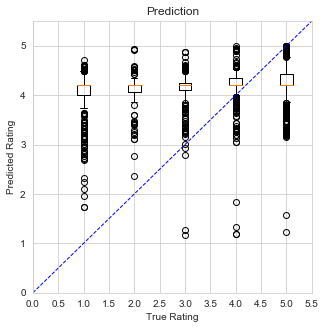

In [101]:
#Printing the RMSE.
print("RMSE =", SVD_error)

#Making box-plot to visualise the RMSE score for the SVD.
MakeBoxplot(y_true, pred[0], 'Prediction')

The SVD model has an RMSE score of 1.24. This score and the boxplot indicate that it is better than the best baseline model with 2%, resulting in the SVD is the best performing model so far. Moreover, it can be deduced that it predicts ${\displaystyle \pm }1$ star in ratings, and that the grid search did not improve model performance. That the SVD is the best performing model is as expected, as it is more advanced than the baseline models; therefore, able to obtain more fluctuations in the data than the baseline models.

#### SVDpp

As the predicted values are calculated, the array will quickly be printed to see some of the predicted values.

In [102]:
#Printing the predicted values
pred[1]

array([3.62757813, 4.19775245, 4.19775245, ..., 4.19775245, 4.34207269,
       4.11215028])

As the predicted values and the observed values now are obtained, the RMSE can be calculated.

In [103]:
#Calculating the RMSE for the SVD++.
SVDpp_error = RMSE(y_true, pred[1])

The RMSE for the optimised SVDpp model will now be shown alongside a box plot of its performance.

RMSE = 1.2435670763706772


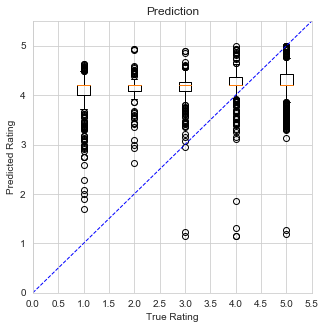

In [104]:
#Printing the RMSE.
print("RMSE =", SVDpp_error)

#Making box-plot to visualise the RMSE score for the SVD++.
MakeBoxplot(y_true, pred[1], 'Prediction')

The SVD++ model has an RMSE score of 1.24. This score and the boxplot indicate that it is better than the best baseline model with 2% and just as well performing as the SVD, resulting in it being one of the best performing models so far. Also, it can be deduced that it predicts ${\displaystyle \pm }1$ star in ratings. Moreover, it is illuminated that the grid search did not improve model performance. That SVD++ do not perform better than the SVD is a bit unexpected from a theoretical standpoint, since the SVD++ is taking implicit ratings into account and should be performing better for this reason. The great amount of higher ratings could be a reason for the implicit ratings are not important.

#### NMF

As the predicted values are calculated, the array will quickly be printed to see some of the predicted values.

In [105]:
#Printing the predicted values
pred[2]

array([4.19775245, 4.19775245, 4.19775245, ..., 4.19775245, 4.19775245,
       4.19775245])

As the predicted values and the observed values now are obtained, the RMSE can be calculated.

In [106]:
#Calculating the RMSE for the NMF.
NMF_error = RMSE(y_true, pred[2])

The RMSE for the optimised NMF model will now be shown alongside a box plot of its performance.

RMSE = 1.25299168535327


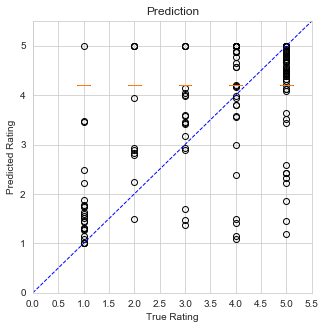

In [107]:
#Printing the RMSE.
print("RMSE =", NMF_error)

#Making box-plot to visualise the RMSE score for the NMF.
MakeBoxplot(y_true, pred[2], 'Prediction')

The NMF model has an RMSE score of 1.25. This score and the boxplot indicate that it is better than the best baseline model with 1% but worse performing than the best performing models so far. Furthermore, it is seen that the grid search did improve model performance by 1%, and it predicts ${\displaystyle \pm }1$ star in ratings. The fact that NMF gives a decomposition of the data in small parts while SVD gives one a decomposition as a linear combination of vectors makes it understandable why the SVD in the given case of this data performs a bit better.

#### kNNBasic

As the predicted values are calculated, the array will quickly be printed to see some of the predicted values.

In [108]:
#Printing the predicted values
pred[3]

array([4.19775245, 4.19775245, 4.19775245, ..., 4.19775245, 4.19775245,
       4.19775245])

As the predicted values and the observed values now are obtained, the RMSE can be calculated.

In [109]:
#Calculating the RMSE for the kNNBasic.
kNNBasic_error = RMSE(y_true, pred[3])

The RMSE for the optimised kNNBasic model will now be shown alongside a box plot of its performance.

RMSE = 1.2795997283867167


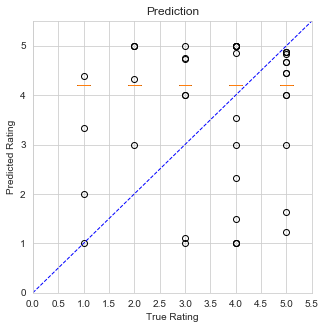

In [110]:
#Printing the RMSE.
print("RMSE =", kNNBasic_error)

#Making box-plot to visualise the RMSE score for the kNNBasic.
MakeBoxplot(y_true, pred[3], 'Prediction')

The kNNBasic model has an RMSE score of 1.28. This score and the boxplot indicate that it is worse than the best baseline model with 2%, it is performing 2% worse after the grid search, and predicts ${\displaystyle \pm }1$ star in ratings.. This worse performance can be due to the data is imbalanced, since a noticeable drawback of kNN algorithms on such data is that the classes with more frequent samples tend to dominate the neighbourhood, which leads to suboptimal performance of the minority classes. The kNNBasic is, as it names suggest, the most basic kNN algorithm, and it is therefore expected that the coming kNN algorithms will perform better.

#### kNNWithMeans

As the predicted values are calculated, the array will quickly be printed to see some of the predicted values.

In [111]:
#Printing the predicted values
pred[4]

array([4.19775245, 4.19775245, 4.19775245, ..., 4.19775245, 4.19775245,
       4.19775245])

As the predicted values and the observed values now are obtained, the RMSE can be calculated.

In [112]:
#Calculating the RMSE for the kNNWithMeans.
kNNWithMeans_error = RMSE(y_true, pred[4])

The RMSE for the optimised kNNWithMeans model will now be shown alongside a box plot of its performance.

RMSE = 1.2438114419802953


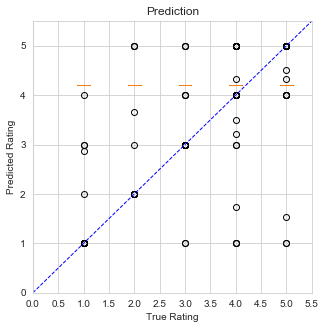

In [113]:
#Printing the RMSE.
print("RMSE =", kNNWithMeans_error)

#Making box-plot to visualise the RMSE score for the kNNWithMeans.
MakeBoxplot(y_true, pred[4], 'Prediction')

The kNNWithMeans model has an RMSE score of 1.24. This score and the boxplot indicate that it is better than the best baseline model with 2% and on par with the other best performing models so far. Further, it can be deduced that it predicts ${\displaystyle \pm }1$ star in ratings. Additionally, it is performing at the same level as before the grid search and performs 4% better than the kNNBasic. The better performance than the kNNBasic was expected since the kNNWithMeans tries to account for the drawback of the kNN algorithm on imbalanced data by taking into account the mean ratings of each user.

#### kNNWithZScore

As the predicted values are calculated, the array will quickly be printed to see some of the predicted values.

In [114]:
#Printing the predicted values
pred[5]

array([4.19775245, 4.19775245, 4.19775245, ..., 4.19775245, 4.19775245,
       4.19775245])

As the predicted values and the observed values now are obtained, the RMSE can be calculated.

In [115]:
#Calculating the RMSE for the kNNWithZScore.
kNNWithZScore_error = RMSE(y_true, pred[5])

The RMSE for the optimised kNNWithZScore model will now be shown alongside a box plot of its performance.

RMSE = 1.2438114419802953


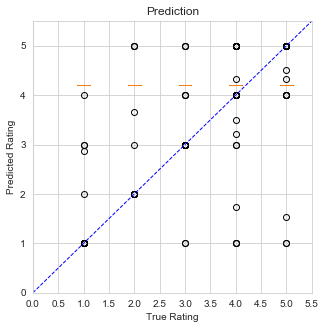

In [116]:
#Printing the RMSE.
print("RMSE =", kNNWithZScore_error)

#Making box-plot to visualise the RMSE score for the kNNWithZScore.
MakeBoxplot(y_true, pred[5], 'Prediction')

The kNNWithZScore model has an RMSE score of 1.24, indicating it, in general, predicts ${\displaystyle \pm }1$ star in ratings. This score and the boxplot indicate that it is better than the best baseline model with 2% and on par with the other best performing models so far. Additionally, it is performing at the same level as before the grid search and performs 4% better than the kNNBasic. The better performance than the kNNBasic was expected since the kNNWithZScore tries to account for the drawback of the kNN algorithm on imbalanced data by taking into account the z-score normalization of each user.

#### kNNBaseline

As the predicted values are calculated, the array will quickly be printed to see some of the predicted values.

In [117]:
#Printing the predicted values
pred[6]

array([4.00937366, 4.19775245, 4.19775245, ..., 4.19775245, 4.2801836 ,
       4.08701367])

As the predicted values and the observed values now are obtained, the RMSE can be calculated.

In [118]:
#Calculating the RMSE for the kNNBaseline.
kNNBaseline_error = RMSE(y_true, pred[6])

The RMSE for the optimised kNNBaseline model will now be shown alongside a box plot of its performance.

RMSE = 1.264931139473926


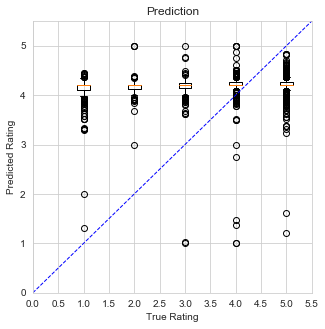

In [119]:
#Printing the RMSE.
print("RMSE =", kNNBaseline_error)

#Making box-plot to visualise the RMSE score for the kNNBaseline.
MakeBoxplot(y_true, pred[6], 'Prediction')

The kNNBaseline model has an RMSE score of 1.26. This score and the boxplot indicate that it is performing at the same level as the best baseline model and are performing 2% worse than the best performing models so far. Further, it can be deduced that it predicts ${\displaystyle \pm }1$ star in ratings. Additionally, it is performing 1% worse after the grid searches and performs 2% better than the kNNBasis. The better performance than the kNNBasic was expected since the kNNBaseline tries to account for the drawback of the kNN algorithm on imbalanced data by taking into account a baseline rating for each user based on previously rated items. That it then still performs worse than the other kNN models is due to so few users have made multiple purchases, and a precise baseline rating for such users is difficult to make.

#### CoClustering

As the predicted values are calculated, the array will quickly be printed to see some of the predicted values.

In [120]:
#Printing the predicted values
pred[7]

array([4.19775245, 4.19775245, 4.19775245, ..., 4.19775245, 4.19775245,
       4.19775245])

As the predicted values and the observed values now are obtained, the RMSE can be calculated.

In [121]:
#Calculating the RMSE for the CoClustering.
CoClustering_error = RMSE(y_true, pred[7])

The RMSE for the optimised CoClustering model will now be shown alongside a box plot of its performance.

RMSE = 1.2537459943027216


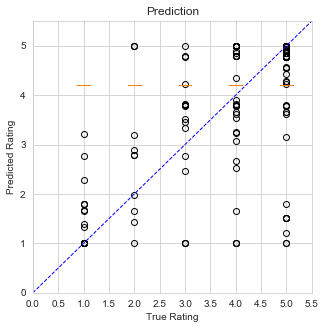

In [122]:
#Printing the RMSE.
print("RMSE =", CoClustering_error)

#Making box-plot to visualise the RMSE score for the CoClustering.
MakeBoxplot(y_true, pred[7], 'Prediction')

The CoClustering model has an RMSE score of 1.25. This score and the boxplot indicate that it is performing 1% better than the best baseline model, and perform at the same level as before the grid search, as well as, in general, predict ${\displaystyle \pm }1$ star in ratings. Additionally, the CoClustering performs 1% worse than the best performing models. A reason for the worse performance than the best performing models is mainly due to potential difficulties of making the different clusters, due to the low amount of returning customers and the differences in the number of times items are rated.

#### SlopeOne

Although it could not be optimised, the SlopeOne is still considered. Consequently, predictions via the SlopeOne will be made below, and its performance will be evaluated.

In [123]:
#Defining the SlopeOne.
algo = SlopeOne()

The algorithm is now defined, and the predictions via the SlopeOne model can be made.

In [124]:
#Train the SlopeOne on the whole trainset.
algo.fit(data_train_surprise)

#Empty arry for storring the predictions.
y_pred = []

#Makeing predictions via the SlopeOne.
for customer_unique_id, product_id in zip(customer_unique_id_true, product_id_true):
    r = algo.predict(customer_unique_id, product_id, verbose=False).est
    y_pred.append(r)
y_pred = np.array(y_pred)

As the predicted values are calculated, the array will quickly be printed to see some of the predicted values.

In [125]:
#Printing the predicted values
y_pred

array([4.19775245, 4.19775245, 4.19775245, ..., 4.19775245, 4.19775245,
       4.19775245])

As the predicted values and the observed values now are obtained, the RMSE can be calculated.

In [126]:
#Calculating the RMSE for the SlopeOne.
SlopeOne_error = RMSE(y_true, y_pred)

The RMSE for the SlopeOne model will now be shown alongside a box plot of its performance.

RMSE = 1.244330944950174


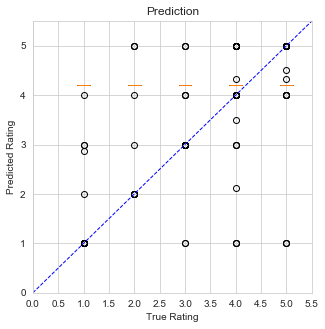

In [127]:
#Printing the RMSE.
print("RMSE =", SlopeOne_error)

#Making box-plot to visualise the RMSE score for the SlopeOne.
MakeBoxplot(y_true, y_pred, 'Prediction')

The SlopeOne model has an RMSE score of 1.24, which indicates it predicts ${\displaystyle \pm }1$ star in ratings. This score and the boxplot indicate that it is better than the best baseline model with 2% and performing on par with the best performing models so fare. As mentioned grid search was not a possibility for this algorithm. Even though the SlopeOne is a straightforward collaborative algorithm, it has many times before shown to perform on par with more complicated and computationally expensive algorithms. The SlopeOne also performs on par with the best models in this case.

#### Summary

It is seen that many models perform at the same level, and in general are predicting ${\displaystyle \pm }1$ star in ratings. Nonetheless, Slopeone is the most recommendable one of these as it performs at par with the others while being one of the most simple algorithms. Furthermore, it is deduced that the grid search did not do much to the performance of the models. A reason for this could be in the chosen parameters chosen to grid search over. If more time were had an expansion of the parameters grid searched over is to be preferred, in order to check whether some of these new parameter values give better results. One could also consider a whole other optimisation technique such as Random Search. Finally, the dataset also provides some difficulties. The fact that there are so few returning customers that have made more than one purchase and so few items that are reviewed multiple times makes it hard to calculate similarities, and further also more difficult for the clustering algorithms to make meaningful clusters.

### 2.4.4 The Cold Start Problem

As stated earlier collaborative filtering methods suffers from what is called the “cold start problem”. The problem is that it is impossible to make recommendations to new users or new items and that users and items with few interactions are difficult to handle.
It can be handled in multiple ways:
- Random strategy,<br>
Recommend random items to new users and new items to random users.
- Maximum expectation strategy, <br>
Recommend popular items to new users and new items to the most active users.
- Exploratory strategy,  <br>
Recommend a set of items to new users and recommend a new item to a set of users.  <br>

Below, a solution to the drawback via the maximum expectation strategy will be made for Olist.

#### New Users

The maximum expectation strategy for new users is that one will recommend popular items to new users, which means recommending the product with the highest combined review score. This favours products with many review scores, but these must be seen as more popular than products with fewer review scores. Below will the most popular products be found to see which products should be recommended for new users.

In [128]:
#Grouping the products by their review score to find the most popular products
popular_products = pd.DataFrame(dfRS.groupby('product_id')['review_score'].count())

#Finding the most popular products measured by review score, by sorting them.
most_popular = popular_products.sort_values('review_score', ascending=False)

The popularity among the products has now been calculated. Therefore will the most popular products now be visualised and found.

In [129]:
#Showcasing the 10 most popular products.
most_popular.head(10)

review_score
product_id                                    
aca2eb7d00ea1a7b8ebd4e68314663af            74
99a4788cb24856965c36a24e339b6058            72
e0cf79767c5b016251fe139915c59a26            46
53b36df67ebb7c41585e8d54d6772e08            42
154e7e31ebfa092203795c972e5804a6            41
422879e10f46682990de24d770e7f83d            34
389d119b48cf3043d311335e499d9c6b            33
e0d64dcfaa3b6db5c54ca298ae101d05            32
2b4609f8948be18874494203496bc318            32
e53e557d5a159f5aa2c5e995dfdf244b            31

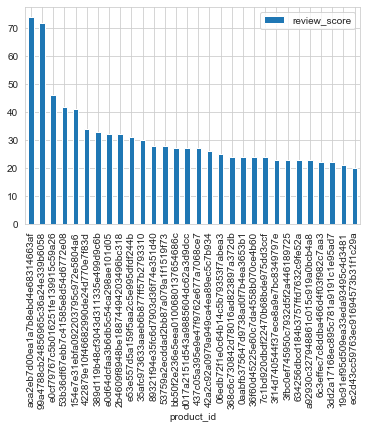

In [130]:
#Plot of the most popular products.
most_popular.head(30).plot(kind = "bar")

The above graph gives the most popular products arranged in descending order sold by the Olist. <br>
From this the products that should be recommended to a new user via the maximum expectation strategy is product `aca2eb7d00ea1a7b8ebd4e68314663af` since it has combined rating of 100, the second one to recommend is `99a4788cb24856965c36a24e339b6058` as it has a combined rating of 83.


#### New Items

The maximum expectation strategy for new items is that one will recommend new items to most active users, which means recommending the item to the users with the most orders. Below will the most popular products be found to see which products should be recommended for new users.

In [131]:
#Finding the most active customers.
active_customers = pd.DataFrame(dfRS['customer_unique_id'].value_counts())

#Sorting them.
most_active_customers = active_customers.sort_values('customer_unique_id', ascending=False)

The most active customer at Olist has now been identified. 

In [132]:
#Showcasing the 10 most active customers.
most_active_customers.head(10)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455                  13
d97b3cfb22b0d6b25ac9ed4e9c2d481b                   7
b09f1bff1aff13c997af071602bc048b                   7
a914b2be4782207abc6758095ec9e8aa                   6
0209f290b5451d357308bc0e90521026                   6
a7d9a3e447614288937ad2bba991676c                   6
a5931be4783e1a1dfbda5c6e145d96bb                   5
473d9165586cfc6708841d07adf6c020                   5
6ba5b2dcb81470882212da717a171539                   5
d75acd4c5b7b4dfd32b9d9172b195419                   5

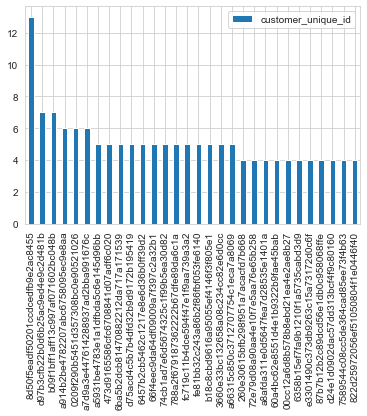

In [133]:
#Plot of the most active customers.
most_active_customers.head(30).plot(kind = "bar")

The above graph gives the most active customers at Olist arranged in descending order. <br>
From this, the users that should get new items recommended via the maximum expectation strategy is user `8d50f5eadf50201ccdcedfb9e2ac8455` since this customer is the most active one. <br>

However, Olist may have a hard time utilising the maximum expectation strategy for new items as of now, since less than 10% of their customers are returning customers. Therefore, the pool of customer to recommend the new items to is limited. Consequently, Olist should consider utilising another strategy for recommending new items. Here, the random strategy which recommends new items to random users is a possibility or the exploratory strategy which recommend a new item to a set of users.

### 2.4.5 Final Remarks - Collaborative Filtering

Nine collaborative filtering models were tested in this section. The first thing to be done was to make an initial test of eight of the models were after they were tried to be optimised via a grid search to find the optimal parameters for the eight models. The ninth model, SlopeOne, do not have any parameters to optimise and is of this reason, not a part of the initial performance testing and grid search. The performance before and after the grid search has been evaluated via the RMSE, and the scores are seen below:  <br>

Model  | RMSE Score Before | RMSE Score After | Improvement 
------------- | ------------- | ------------- | -------------
kNNBaseline  | 1.25 | 1.26 | -1%
kNNBasic | 1.26 | 1.28 | -2%
kNNWithMeans | 1.24 | 1.24 | 0%
kNNWithZScore | 1.24 | 1.24 | 0%
SVD | 1.24 | 1.24 | 0%
SVDpp | 1.24 | 1.24 | 0%
NMF | 1.26 | 1.25 | 1%
CoClustering | 1.25 | 1.25 | 0%
SlopeOne | - | 1.24 | -

The table shows that the grid search did not do much to the models' performance. Therefore, one may consider making use of additional parameter values and different parameter values in the grid search or to make use of another optimisation strategy such as Random Search in the future. Moreover, it is identified that the collaborative filtering models' performance is very close to each other, they are predicting ${\displaystyle \pm }1$ star in ratings, and almost all of them perform better than the best baseline model. The best performing models are SVD, SVD++, kNNWithMeans, kNNWithZScore and Slopeone. On this basis, it is recommended for Olist to make use of the SlopeOne because it is one of the simplest collaborative filtering algorithms, and it performs on par with the others. <br>
Nonetheless, if Olist or others chooses one of the two kNN methods, they must consider how they will perform on balanced data. The current Olist data is unbalanced with a tendency towards higher ratings; if the data become more balanced due to lower ratings are being given the kNN methods may not perform as well as they do currently. This showcases the need to all the time updating and reassessing one's recommender system model, which is highly recommended for Olist to do. <br>

A drawback of the collaborative filtering approaches, called the "cold start problem", was introduced in the introduction to collaborative filtering. The problem is that it is impossible to make recommendations to new users or new items and that users and items with few interactions are challenging to handle. The drawback can be handled in multiple ways, Random strategy, Maximum expectation strategy, and Exploratory strategy. A solution for Olist to the "cold start problem" has been tried developed via the maximum expectation strategy. For new users, the most popular items were found, and these items should get recommended to new users. And for new items, the most actives customers were found. However, one must be aware of the fact that the low amount of returning customer provides a limited pool of customer to use for new items. For this reason, it is recommended that Olist make use of one of the two other strategies when solving the cold start problem for new items, and here it is recommended for Olist to make use of the random strategy.


## 2.5 Item-Item Collaborative Filtering Example

The different collaborative filtering methods have now been tested, and the best performing algorithm is found. The next step is to show the applicability of recommender systems to Olist. This is done via utilising an Item-Item collaborative filtering method to recommend items to a given user. Thereby providing a recommendation to a user based on item similarity. Item-Item is chosen as it is easier to capture the similarity between items rather than users; however, the most common pitfall of item-item is that the system can provide very obvious recommendations. The Item-Item collaborative filtering of choice in this example is the kNNBaseline, where the item feature will be utilised to a much higher degree when making predictions than in the previous usage of the algorithm. The predictions score provided by item-item filtering is computed using the following formula:

$$ r_{ui} = \mu_{i} + \frac{\Sigma_{j \in \mathbf{K}}sim(i,j)(r_{uj}-\mu_{j})}{\Sigma_{j \in \mathbf{K}}|sim(i,j)|}  $$
Where $\mu_i$ is a mean rating for an item and $sim$ is the similarity measure used. <br>

From the descriptive analysis, a high number of unique items were identified, which results in a high number of similarities to be calculated. This is computationally not possible for us. For this reason, an Item-Item collaborative filtering method over product categories was chosen, because it has been identified that there are 70 product categories, which results in fewer similarities that need to be calculated. Consequently, the user will get recommended a product category and not a specific item, which is not optimal but a necessity due to the lack of computational power. <br>

The following product-specific variables are available within the data for making the Item-Item collaborative filtering.
- `product_photos_qty` - Number of photos
- `product_weight_g` - Weight of product in grams
- `product_length_cm` - Length of product in centimeter
- `product_height_cm` - Height of product in centimeter
- `product_width_cm` -  Width of product in centimeter

The median is used instead of the mean, so outliers will not have such a big impact. <br>
The following plots show the distribution of values for each attribute.

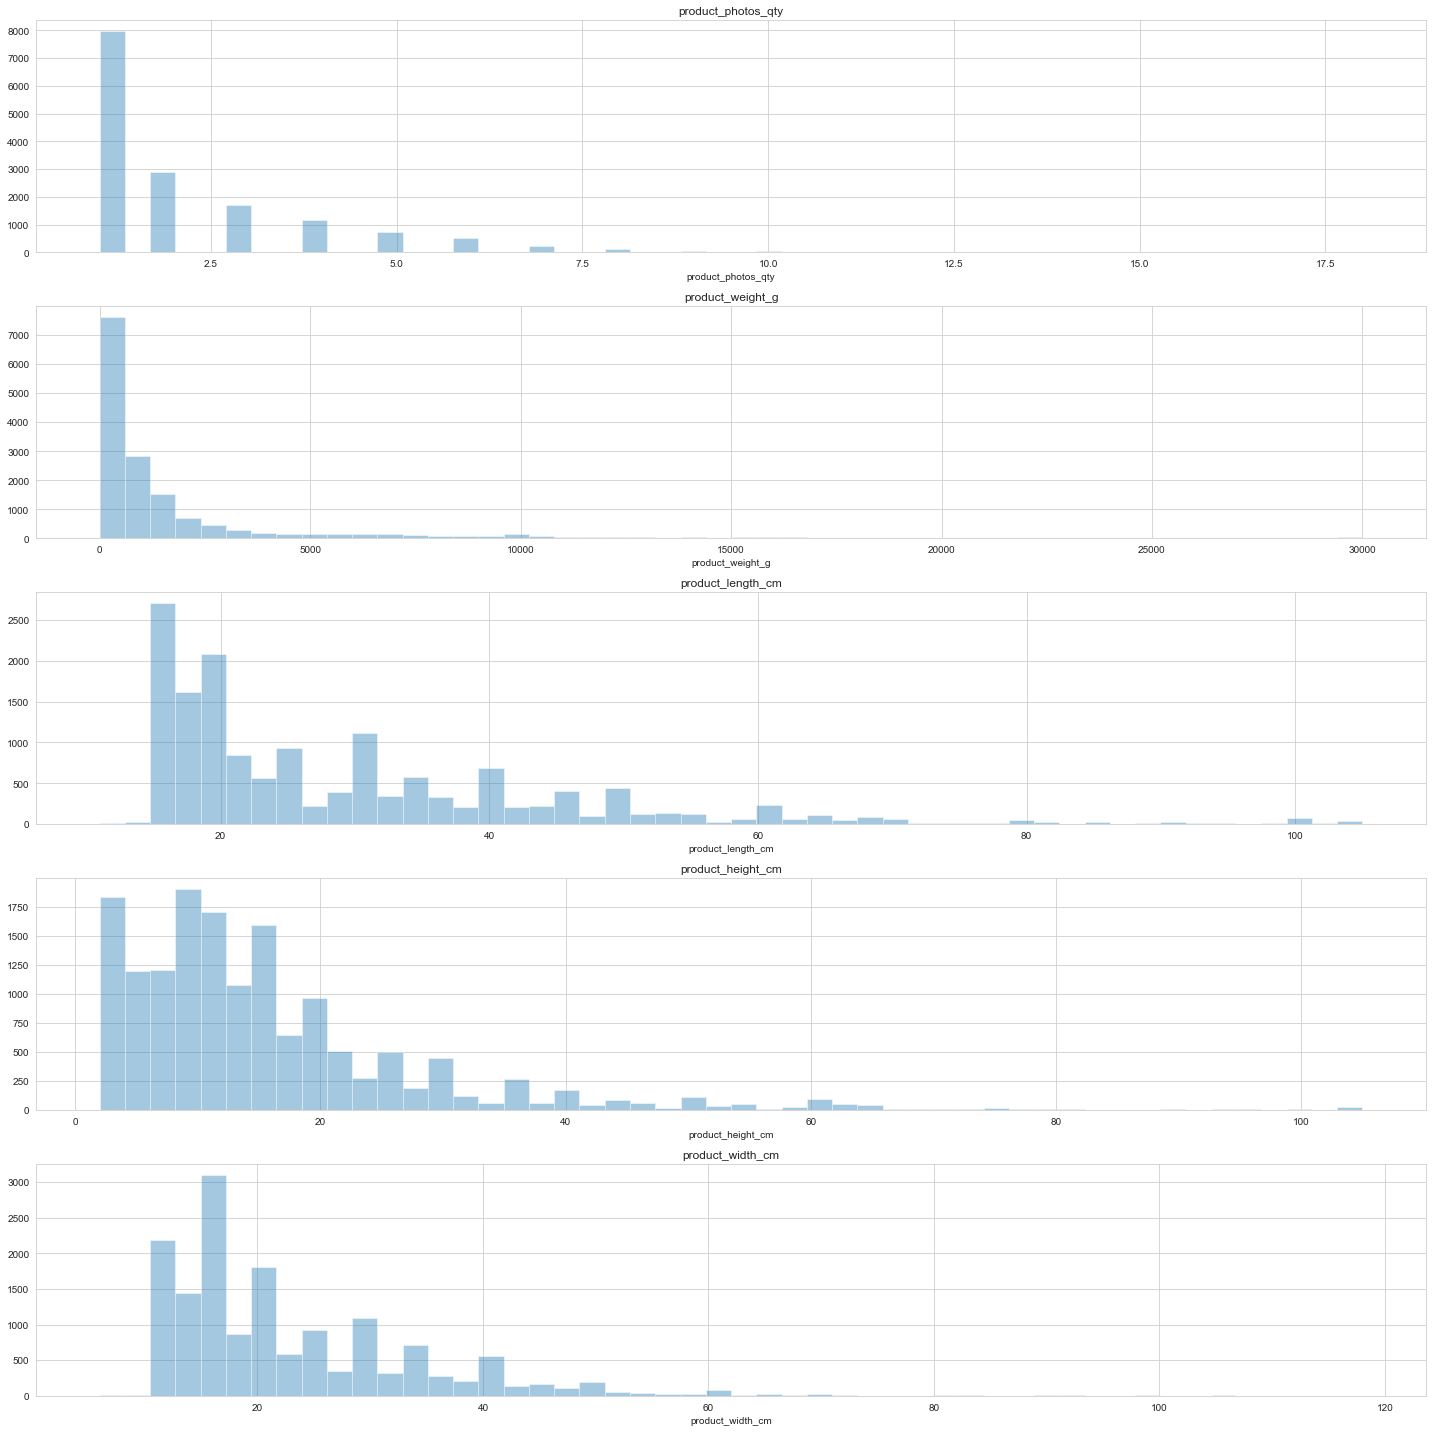

In [134]:
#Plotting distribution of the attributes
attributes = ['product_photos_qty', 'product_weight_g','product_length_cm','product_height_cm','product_width_cm']
plt.figure(figsize=(20,20))
for i in range(len(attributes)):
    plt.subplot(5,1,i+1)
    sns.distplot(dfRS[attributes[i]],kde=False)
    plt.title(attributes[i])
plt.tight_layout()
plt.show()

An idea of the distribution of the single product-specific variables has now been obtained, and it is seen that `product_weight_g` has significantly higher values than the rest of the parameters. <br>
The next thing is to calculate the median for each attribute for each product category and put it into a data frame that can be used for future calculations.

In [135]:
#Calculating median for each attribute for each product category.
product_cat_x = dfRS[['product_category_name_english','product_photos_qty', 'product_weight_g', 'product_length_cm',
                      'product_height_cm','product_width_cm']].groupby('product_category_name_english').median()
product_cat_x

product_photos_qty  product_weight_g  \
product_category_name_english                                         
agro_industry_and_commerce                    2.0            2467.0   
air_conditioning                              2.0            1450.0   
art                                           1.0            1700.0   
arts_and_craftmanship                         5.5            2725.0   
audio                                         1.0             312.5   
...                                           ...               ...   
stationery                                    3.0             775.0   
tablets_printing_image                        1.0             283.0   
telephony                                     2.0             200.0   
toys                                          2.0             652.0   
watches_gifts                                 2.0             325.0   

                               product_length_cm  product_height_cm  \
product_category_name_english                                         
agro_industry_and_commerce                  30.0               27.0   
air_conditioning                            30.5               25.0   
art                                         65.0                6.0   
arts_and_craftmanship                       48.0               13.0   
audio                                       19.0               11.0   
...                                          ...                ...   
stationery                                  28.0               16.0   
tablets_printing_image                      22.0               12.0   
telephony                                   18.0                4.0   
toys                                        28.0               17.0   
watches_gifts                               16.0               10.0   

                               product_width_cm  
product_category_name_english                    
agro_industry_and_commerce                 20.0  
air_conditioning                           22.0  
art                                        50.0  
arts_and_craftmanship                      32.5  
audio                                      16.0  
...                                         ...  
stationery                                 22.0  
tablets_printing_image                     21.0  
telephony                                  12.0  
toys                                       21.0  
watches_gifts                              14.0  

[70 rows x 5 columns]

It is identified from the distribution plot and the above matrix that the `product_weight_g` has significantly higher values than the rest of the parameters. For this reason, each column is being normalised before calculating the similarities.

In [136]:
#Normalising each column.
from sklearn import preprocessing
x = product_cat_x.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
product_cat = pd.DataFrame(x_scaled,index=product_cat_x.index)
product_cat.head()

0         1         2     3         4
product_category_name_english                                              
agro_industry_and_commerce     0.222222  0.199297  0.215385  0.50  0.090909
air_conditioning               0.222222  0.109890  0.223077  0.46  0.113636
art                            0.000000  0.131868  0.753846  0.08  0.431818
arts_and_craftmanship          1.000000  0.221978  0.492308  0.22  0.232955
audio                          0.000000  0.009890  0.046154  0.18  0.045455

As mentioned similarities between categories are needed, and everything needed to calculate these are now ready. Therefore, the similarity calculation can now begin. In this case, the cosine-similarity is chosen as the similarity measure. Its formula is seen below:
$$sim(\boldsymbol{A},\boldsymbol{B}) = cos(\theta) = \frac{\boldsymbol{A} \boldsymbol{B}}{||\boldsymbol{A}|| \; ||\boldsymbol{B}||}$$

The similarities will be calculated below using the cosine-similarity.

In [137]:
#Calculating similarities.
from sklearn.metrics.pairwise import cosine_similarity
sim = pd.DataFrame(columns=['Id1','Id2','Sim'])
for i in range(product_cat.shape[0]):
    for j in range(i+1,product_cat.shape[0]):
        x = cosine_similarity(np.array([product_cat.iloc[i].values]),np.array([product_cat.iloc[j].values]))[0][0]
        sim = sim.append({'Id1' : product_cat.index[i], 'Id2' : product_cat.index[j], 'Sim' : x} , ignore_index=True)
sim.head()

Id1                    Id2       Sim
0  agro_industry_and_commerce       air_conditioning  0.989194
1  agro_industry_and_commerce                    art  0.483865
2  agro_industry_and_commerce  arts_and_craftmanship  0.679762
3  agro_industry_and_commerce                  audio  0.882215
4  agro_industry_and_commerce                   auto  0.895594

The similarities between the different product categories are now calculated, and four of them are seen above, to visualise them. 

As the aim is to show how Olist can utilise a recommender system by recommending a specific product category for a user, it is required to pick a user to recommend product categories to. This user needs to have made more than one purchase at Olist, so first and foremost, it is a necessity to find out which users have made more than one purchase at Olist. By counting the occurrences of `customer_unique_id` it can be seen how many time each customer have made purchases. It is done below and afterwards, a user with a count higher than 1 should be chosen.

In [138]:
#Finding out which users have made more than one order at Olist, for selecting a user to make recommendations for.
dfRS.groupby('customer_unique_id').count()['product_category_name'].sort_values(ascending=False)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    13
b09f1bff1aff13c997af071602bc048b     7
d97b3cfb22b0d6b25ac9ed4e9c2d481b     7
0209f290b5451d357308bc0e90521026     6
a7d9a3e447614288937ad2bba991676c     6
                                    ..
a69387176d3b3517e3c9f589921063ad     1
a691620b83068f15ae65ffaff294660a     1
a688f49c277a0eb82f40622a59327ebd     1
a686195a3b62c95c691dceaf41c27980     1
0004bd2a26a76fe21f786e4fbd80607f     1
Name: product_category_name, Length: 14309, dtype: int64

A user with a count higher than 1 needs to be picked. The user picked is CustomerID: `8d50f5eadf50201ccdcedfb9e2ac8455`

In [139]:
#Defining the user.
user_id = '8d50f5eadf50201ccdcedfb9e2ac8455'

The user is now picked, and the similarities are chosen; therefore, the calculation mentioned earlier can be implemented:
$$ r_{xi} = \mu_{i} + \frac{\Sigma_{j \in \mathbf{K}}sim(i,j)(r_{xj}-\mu_{j})}{\Sigma_{j \in \mathbf{K}}|sim(i,j)|}  $$

For making this implementation, K needs to be defined, which is the number of neighbours. For this example, $K=5$ is choosen.

In [140]:
#Defining K.
K = 5

Calculating each customers rating of the product categories.

In [141]:
user_cat_score = dfRS_train.groupby(['customer_unique_id','product_category_name_english'])['review_score'].mean()
user_cat_score = pd.DataFrame(user_cat_score).reset_index()
user_cat_score

customer_unique_id product_category_name_english  \
0      0004bd2a26a76fe21f786e4fbd80607f                  garden_tools   
1      000d460961d6dbfa3ec6c9f5805769e1                     telephony   
2      000ed48ceeb6f4bf8ad021a10a3c7b43         computers_accessories   
3      0010fb34b966d44409382af9e8fd5b77                bed_bath_table   
4      0014a5a58da615f7b01a4f5e194bf5ea                 health_beauty   
...                                 ...                           ...   
11843  ffc3ea5436ad9c11ee9abdd56b85509f               home_appliances   
11844  ffcd4b43c08405501a6bf2c66be83e83        books_general_interest   
11845  ffddff7cfa827d6c430ed9e373be416c                    cool_stuff   
11846  ffe0c10afc687bcf34a0451f2b87dd9b               furniture_decor   
11847  ffe8f2fc0cee48f79934bd2c506fafc0                     telephony   

       review_score  
0               4.0  
1               5.0  
2               5.0  
3               4.0  
4               5.0  
...             ...  
11843           5.0  
11844           5.0  
11845           3.0  
11846           1.0  
11847           3.0  

[11848 rows x 3 columns]

The `user_cat_score` is being pivoted for making it usable in the predictions for the selected user.

In [142]:
#Pivot into scare_table.
score_table = pd.pivot_table(user_cat_score,index='customer_unique_id', columns='product_category_name_english', 
                             values='review_score')
score_table.head()

product_category_name_english     agro_industry_and_commerce  \
customer_unique_id                                             
0004bd2a26a76fe21f786e4fbd80607f                         NaN   
000d460961d6dbfa3ec6c9f5805769e1                         NaN   
000ed48ceeb6f4bf8ad021a10a3c7b43                         NaN   
0010fb34b966d44409382af9e8fd5b77                         NaN   
0014a5a58da615f7b01a4f5e194bf5ea                         NaN   

product_category_name_english     air_conditioning  art  \
customer_unique_id                                        
0004bd2a26a76fe21f786e4fbd80607f               NaN  NaN   
000d460961d6dbfa3ec6c9f5805769e1               NaN  NaN   
000ed48ceeb6f4bf8ad021a10a3c7b43               NaN  NaN   
0010fb34b966d44409382af9e8fd5b77               NaN  NaN   
0014a5a58da615f7b01a4f5e194bf5ea               NaN  NaN   

product_category_name_english     arts_and_craftmanship  audio  auto  baby  \
customer_unique_id                                                           
0004bd2a26a76fe21f786e4fbd80607f                    NaN    NaN   NaN   NaN   
000d460961d6dbfa3ec6c9f5805769e1                    NaN    NaN   NaN   NaN   
000ed48ceeb6f4bf8ad021a10a3c7b43                    NaN    NaN   NaN   NaN   
0010fb34b966d44409382af9e8fd5b77                    NaN    NaN   NaN   NaN   
0014a5a58da615f7b01a4f5e194bf5ea                    NaN    NaN   NaN   NaN   

product_category_name_english     bed_bath_table  books_general_interest  \
customer_unique_id                                                         
0004bd2a26a76fe21f786e4fbd80607f             NaN                     NaN   
000d460961d6dbfa3ec6c9f5805769e1             NaN                     NaN   
000ed48ceeb6f4bf8ad021a10a3c7b43             NaN                     NaN   
0010fb34b966d44409382af9e8fd5b77             4.0                     NaN   
0014a5a58da615f7b01a4f5e194bf5ea             NaN                     NaN   

product_category_name_english     books_imported  ...  pet_shop  \
customer_unique_id                                ...             
0004bd2a26a76fe21f786e4fbd80607f             NaN  ...       NaN   
000d460961d6dbfa3ec6c9f5805769e1             NaN  ...       NaN   
000ed48ceeb6f4bf8ad021a10a3c7b43             NaN  ...       NaN   
0010fb34b966d44409382af9e8fd5b77             NaN  ...       NaN   
0014a5a58da615f7b01a4f5e194bf5ea             NaN  ...       NaN   

product_category_name_english     signaling_and_security  small_appliances  \
customer_unique_id                                                           
0004bd2a26a76fe21f786e4fbd80607f                     NaN               NaN   
000d460961d6dbfa3ec6c9f5805769e1                     NaN               NaN   
000ed48ceeb6f4bf8ad021a10a3c7b43                     NaN               NaN   
0010fb34b966d44409382af9e8fd5b77                     NaN               NaN   
0014a5a58da615f7b01a4f5e194bf5ea                     NaN               NaN   

product_category_name_english     small_appliances_home_oven_and_coffee  \
customer_unique_id                                                        
0004bd2a26a76fe21f786e4fbd80607f                                    NaN   
000d460961d6dbfa3ec6c9f5805769e1                                    NaN   
000ed48ceeb6f4bf8ad021a10a3c7b43                                    NaN   
0010fb34b966d44409382af9e8fd5b77                                    NaN   
0014a5a58da615f7b01a4f5e194bf5ea                                    NaN   

product_category_name_english     sports_leisure  stationery  \
customer_unique_id                                             
0004bd2a26a76fe21f786e4fbd80607f             NaN         NaN   
000d460961d6dbfa3ec6c9f5805769e1             NaN         NaN   
000ed48ceeb6f4bf8ad021a10a3c7b43             NaN         NaN   
0010fb34b966d44409382af9e8fd5b77             NaN         NaN   
0014a5a58da615f7b01a4f5e194bf5ea             NaN         NaN   

product_category_name_english     tablets_printing_image  telepho

The needed correlations for the method is calculated.

In [143]:
#Calculating correlations.
correlations = score_table.corr()

Since it only is of interest to recommend a new product category to the user, it is needed to find out which product categories the user have not rated. Therefore, it will now be calculated which product categories the user have not rated and store them in a data frame. The data frame is made on the assumption that the user has not purchased anything in product categories he/she have not rated.

In [144]:
# Find a list of missing ratings for the user.
missing_ratings = score_table.loc[user_id]
missing_ratings = missing_ratings[missing_ratings.isnull()]
missing_ratings

product_category_name_english
agro_industry_and_commerce   NaN
air_conditioning             NaN
art                          NaN
arts_and_craftmanship        NaN
audio                        NaN
                              ..
stationery                   NaN
tablets_printing_image       NaN
telephony                    NaN
toys                         NaN
watches_gifts                NaN
Name: 8d50f5eadf50201ccdcedfb9e2ac8455, Length: 67, dtype: float64

Everything is now in place for making a recommendation to the user. The for-loop below will output the most recommendable product categories for the user in descending order, based on the predicted rating for the product category by the user. The for-loop is kindly borrowed from the "Recommender Systems" notebook provided by Stanislav Borysov during the course.

In [145]:
#For-loop for making recommendations for the chosen user based on th
for product_category_name_english, val in missing_ratings.iteritems():
    rating = 0
    weights_sum = 0
    neighbours_corr = correlations[product_category_name_english].sort_values(ascending=False)[1: K+1]
    item_mean = score_table[product_category_name_english].mean()
    neighbours_ratings = score_table[neighbours_corr.index].transpose()
    neighbours_means = neighbours_ratings.mean(axis=1)
    for neighbour_id, row in neighbours_ratings.iterrows():
        if np.isnan(row[user_id]): continue
        rating += neighbours_corr[neighbour_id] * (row[user_id] - neighbours_means[neighbour_id])
        weights_sum += abs(neighbours_corr[neighbour_id])
    if weights_sum > 0:
        rating /= weights_sum
    rating += item_mean
    missing_ratings.at[product_category_name_english] = rating
print(missing_ratings.sort_values(ascending=False)[0:70])

product_category_name_english
fashion_childrens_clothes    5.000000
health_beauty                4.947056
watches_gifts                4.906440
computers_accessories        4.888968
books_technical              4.818182
                               ...   
flowers                      3.750000
office_furniture             3.629496
art                          3.416667
computers                    3.333333
la_cuisine                   1.000000
Name: 8d50f5eadf50201ccdcedfb9e2ac8455, Length: 67, dtype: float64


It can be deduced that the most recommendable product category for user `8d50f5eadf50201ccdcedfb9e2ac8455` is `fashion_childrens_clothes` <br>
Furthermore, it is seen that all product categories in the top five above have a high predicted rating, which means it is predicted that the user to a high degree will like these product categories.

### 2.5.1 Final Remarks - Item-Item Collaborative Filtering Exampel

In the above, the applicability of recommender systems was shown by making a tangible example via recommending a product category to a given user, via using an Item-Item collaborative filtering method.
The usage of the Item-Item was chosen as it is easier to capture the similarity between items rather than users. Unfortunately, the computational power needed to make the similarities between products was not available, due to the high amount of different products. For this reason, it was chosen to make the Item-Item collaborative filtering between product categories. This is not optimal; however, this section is just meant as an example for Olist to see how applicable recommender systems are. <br>
User `8d50f5eadf50201ccdcedfb9e2ac8455` was chosen to be the one making recommendations for. The recommendations to the user showed that the most recommendable product category was `fashion_childrens_clothes` but also that all of the five most recommendable product categories are predicted to be highly rated by the user. One should remember the general tendency towards higher ratings in the data when seeing the high predicted ratings in the top 5.


# 3 Conclusion

The leading problem for the e-commerce industry is that they have trouble ensuring the same superior customer services as physical stores. The e-commerce industry can not to the same degree as the physical store's guide and helps its customers. To tackle this problem, the e-commerce industry has developed recommender systems, and they have proven themselves to be critical for the e-commerce industry. Reason being, the recommender systems recommend new products to users based analysing a user's purchase pattern. Thereby helps the recommender system the user finds new and exciting products, and help the company generate more revenue. Consequently, an e-commerce company like Olist must consider recommender systems if they want to keep up with their industry. Therefore, an investigation of recommender systems for Olist have been conducted. The data provided to make the investigation is the Brazilian E-Commerce Public Dataset which has information on 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. But, to make recommender systems on such a big dataset would require more computational resources than available. Consequently, it was chosen to use a subset of the datasets which is bound to a specific geographic region, and the area of choice was the stat Sao Paolo due to the high amount of orders in this stat. <br>
It all started with a descriptive analysis, in which it was illuminated that there is a really low percentage of returning customers, in fact only 6% are returning customer. Moreover, a general tendency towards higher ratings was identified as the mean review score is 4.19 and the median is 5. <br>
Afterwards, 12 different recommender systems were tested. Firstly, three baseline models were tested and evaluated, where after nine collaborative filtering algorithms were testes, tried optimised and evaluated. All the model's performance was evaluated via the RMSE, and the following results were obtained:

Model  | RMSE Score | Model | RMSE Score 
------------- | ------------- | ------------- | ------------- 
Global Mean  | 1.27 | kNNWithZScore | 1.24
NormalPredictor  | 1.62 | SVD | 1.24
BaselineOnly  | 1.26 | SVDpp | 1.24
kNNBaseline  | 1.26 | NMF | 1.25
kNNBasic | 1.28 | CoClustering | 1.25 
kNNWithMeans | 1.24 | SlopeOne | 1.24

The table illuminates that the different recommender systems are performing almost equally well, as they all predict ${\displaystyle \pm }1$ star in ratings. However, the best performing recommender systems, based on the RMSE, are SVD, SVD++, kNNWithZScore, kNNWithMeans, and SlopeOne.<br>
Something all collaborative filtering models suffer from what is called the "cold start problem". The problem is that it is impossible to make recommendations to new users or new items and that users and items with few interactions are difficult to handle. This problem was tried to be solved via maximum expectation strategy and found that for new users they should recommend them item `aca2eb7d00ea1a7b8ebd4e68314663af` whereas for new items, maximum expectation strategy is not the best choice since the low amount of returning customers. Thus, the random strategy is a better choice for dealing with the cold start problem for new items. <br>
After the investigation of the collaborative filtering methods, a tangible example was given via an Item-Item collaborative filtering method. This example showed the applicability of recommender systems and how it can help recommend a new product category to a given user. Thereby, Olist is offered a tangible example of how it can be done and should also help them see the true value of recommender systems for them. The example was made for user ` 8d50f5eadf50201ccdcedfb9e2ac8455` and aimed at recommending a new product category to the user, and it showed that the user should get recommended the product category `fashion_childrens_clothes`.<br>
All in all, recommender systems is something that Olist needs as of now, due to the fact they are having a hard time retaining customers. It is recommended that Olist make use of the SlopeOne algorithm as it performed the best and is one of the simplest collaborative filtering algorithms. Furthermore, to solves the cold start problem, Olist must utilise the maximum expectation strategy for new users and the random strategy for new items, due to the low amount of returning customers.